# Mallien rakentelua

In [1]:
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.exceptions as exceptions
import os
import json
import numpy as np
from dotenv import load_dotenv
from azure.cosmos import CosmosClient, PartitionKey

load_dotenv('../../shared/.env')

# database env
URL = os.getenv('COSMOSDB_ENDPOINT')  
MASTER_KEY = os.getenv('COSMOSDB_KEY')

# init client
client = cosmos_client.CosmosClient(URL, {'masterKey': MASTER_KEY}, user_agent="", user_agent_overwrite=True)

# Create a database (if it doesn't exist)
database_name = 'MojovaDB'
database = client.get_database_client(database_name)

# Create a container (if it doesn't exist)
container_name = 'Analytics'
try:
    container = database.create_container_if_not_exists(
        id=container_name,
        partition_key=PartitionKey(path='/medallion'),
        offer_throughput=400
    )
except exceptions.CosmosResourceExistsError:
    container = database.get_container_client(container_name)

import pandas as pd
query = "SELECT * FROM c WHERE c['/medallion'] = 'silver_hopp'"
data = container.query_items(query=query, enable_cross_partition_query=True)

# data contains iterator object
data = [item for item in data]

df = pd.DataFrame(data)

query = "SELECT * FROM c WHERE c['/medallion'] = 'gold_hopp'"
data = container.query_items(query=query, enable_cross_partition_query=True)
data = [item for item in data]

df_g = pd.DataFrame(data)

df_g

quarter datajoukko  \
0   01.0_2022     kooste   
1   01.0_2023     kooste   
2   02.0_2022     kooste   
3   02.0_2023     kooste   
4   03.0_2021     kooste   
5   03.0_2022     kooste   
6   04.0_2021     kooste   
7   04.0_2022     kooste   
8     01_2022     kainuu   
9     02_2023     kainuu   
10    03_2021     kainuu   
11    03_2022     kainuu   
12    03_2023     kainuu   
13    04_2022     kainuu   

    1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
0                                            4.150000                                      
1                                            4.566667                                      
2                                            4.336667                                      
3                                            4.340000                                      
4                                            4.476667                                      
5                                            4.560000                                      
6                                            4.230000                                      
7                                            4.392500                                      
8                                            4.500000                                      
9                                            4.615385                                      
10                                           4.800000                                      
11                                           4.706667                                      
12                                           4.200000                                      
13                                           4.444444                                      

    2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
0                                            4.073333                             
1                                            4.640000                             
2                                            4.403333                             
3                                            4.375000                             
4                                            4.253333                             
5                                            4.483333                             
6                                            4.460000                             
7                                            4.246667                             
8                                            4.727273                             
9                                            4.666667                             
10                                           4.647059                             
11                                           4.750000                             
12                                           4.000000                             
13                                           4.538462                             

    3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
0                                            4.046667                                   
1                                            4.585000                                   
2                                            4.323333                                   
3                                            4.315000                                   
4                                            4.270000                                   
5                                            4.530000                                   
6                                            4.330000                                   
7                                            4.320000                                   
8                                            4.454545                                   
9                                            4.545455               

In [2]:
df.columns

Index(['org_code', 'unit_code', 'quarter',
       '1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin',
       '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa',
       '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta',
       '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe',
       '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille',
       '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan',
       '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista',
       '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita',
       '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana',
       '10_hoitajat_kohtelivat_minua_hyvin',
       '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita',
    

In [3]:
df.describe()

org_code  sairaalatyyppiyo_=_1ks_=_2  vuosineljannes     kyselyita  \
count    2217.0                      1554.0    17075.000000  17075.000000   
mean      117.0                         2.0   202202.702020     88.492592   
std         0.0                         0.0       70.288954    150.238638   
min       117.0                         2.0   202103.000000      1.000000   
25%       117.0                         2.0   202104.000000      9.000000   
50%       117.0                         2.0   202202.000000     44.000000   
75%       117.0                         2.0   202301.000000    106.000000   
max       117.0                         2.0   202302.000000   1330.000000   

         vastauksia     keskiarvo   unnamed:_25           _ts  
count  17075.000000  14237.000000     27.000000  1.929200e+04  
mean      70.806384      4.609520  25606.111111  1.732667e+09  
std      114.662467      0.369086     73.390071  6.228503e+05  
min        1.000000      2.200000  25510.000000  1.732136e+09  
25%        8.000000      4.480000  25568.000000  1.732136e+09  
50%       37.000000      4.740000  25589.000000  1.732136e+09  
75%       88.000000      4.860000  25623.000000  1.733398e+09  
max     1277.000000      5.000000  25765.000000  1.733398e+09

In [4]:
df_columns = ['quarter', '1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin',
       '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa',
       '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta',
       '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe',
       '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille',
       '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan',
       '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista',
       '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita',
       '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana',
       '10_hoitajat_kohtelivat_minua_hyvin',
       '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita',
       '12_hoitajat_huolehtivat_yksityisyyteni_toteutumisesta',
       '13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti',
       '14_sain_hoitajilta_apua_riittavan_nopeasti_halutessani_wc:hen_tai_alusastian',
       '15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat',
       '16_hoitajat_ohjasivat_ymmarrettavasti_jatkohoitooni_liittyvat_asiat',
       '17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat',
       '18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon',
       '19_hoitaja_huolehti_etta_sain_lievitysta_kipuihin_kun_siihen_oli_tarvetta',
       '20_hoitajat_arvioivat_kipujani_riittavan_usein',
       '21_hoitajat_kuuntelivat_minua_huolellisesti',
       '22_hoitajat_olivat_aidosti_lasna']

df_1 = df[df_columns]
df_1

quarter  \
0      2_2023   
1      2_2023   
2      2_2023   
3      2_2023   
4      2_2023   
...       ...   
19287    None   
19288    None   
19289    None   
19290    None   
19291    None   

      1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
0                                                      E                                     
1                                                      5                                     
2                                                      5                                     
3                                                      5                                     
4                                                      5                                     
...                                                  ...                                     
19287                                               None                                     
19288                                               None                                     
19289                                               None                                     
19290                                               None                                     
19291                                               None                                     

      2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
0                                                      E                            
1                                                      5                            
2                                                      5                            
3                                                      4                            
4                                                      5                            
...                                                  ...                            
19287                                               None                            
19288                                               None                            
19289                                               None                            
19290                                               None                            
19291                                               None                            

      3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
0                                                      E                                  
1                                                      5                                  
2                                                      5                                  
3                                                      5                                  
4                                                      5                                  
...                                                  ...                                  
19287                                               None                                  
19288                                               None                                  
19289                                               None                                  
19290                                               None                                  
19291                                               None                                  

      4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
0                                                      E                   
1                                                      5                   
2                                                      E                   
3                                                      5                   
4                                                   None                   
...                                                  ...                   
19287                     

In [5]:
df_1.describe()

quarter  \
count     2217   
unique       6   
top     3_2022   
freq       540   

        1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
count                                                2163                                      
unique                                                  6                                      
top                                                     5                                      
freq                                                 1579                                      

        2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
count                                                2121                             
unique                                                  6                             
top                                                     5                             
freq                                                 1549                             

        3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
count                                                2135                                   
unique                                                  6                                   
top                                                     5                                   
freq                                                 1589                                   

       4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
count                                                1945                   
unique                                                  6                   
top                                                     E                   
freq                                                  869                   

        5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
count                                                1989         
unique                                                  6         
top                                                     5         
freq                                                  842         

        6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan  \
count                                                1784                                          
unique                                                  6                                          
top                                                     5                                          
freq                                                  974                                          

        7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista  \
count                                                1772                                  
unique                                                  6                                  
top                                                     5                                  
freq                                                  828                                  

        8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita  \
count                                                1968                                          
unique                                                  6                                          
top                                                     5                                          
freq                                                 1076                                          

        9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana  \
count                                                2024                       
unique                                                  6                       
top                                                     5                       
freq                    

In [6]:
import numpy as np
df_1.replace("E", np.nan, inplace=True)

/tmp/ipykernel_123556/4256172786.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1.replace("E", np.nan, inplace=True)
/tmp/ipykernel_123556/4256172786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.replace("E", np.nan, inplace=True)


In [7]:
df_1

quarter  \
0      2_2023   
1      2_2023   
2      2_2023   
3      2_2023   
4      2_2023   
...       ...   
19287    None   
19288    None   
19289    None   
19290    None   
19291    None   

       1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
0                                                    NaN                                      
1                                                    5.0                                      
2                                                    5.0                                      
3                                                    5.0                                      
4                                                    5.0                                      
...                                                  ...                                      
19287                                                NaN                                      
19288                                                NaN                                      
19289                                                NaN                                      
19290                                                NaN                                      
19291                                                NaN                                      

       2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
0                                                    NaN                             
1                                                    5.0                             
2                                                    5.0                             
3                                                    4.0                             
4                                                    5.0                             
...                                                  ...                             
19287                                                NaN                             
19288                                                NaN                             
19289                                                NaN                             
19290                                                NaN                             
19291                                                NaN                             

       3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
0                                                    NaN                                   
1                                                    5.0                                   
2                                                    5.0                                   
3                                                    5.0                                   
4                                                    5.0                                   
...                                                  ...                                   
19287                                                NaN                                   
19288                                                NaN                                   
19289                                                NaN                                   
19290                                                NaN                                   
19291                                                NaN                                   

       4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
0                                                    NaN                    
1                                                    5.0                    
2                                                    NaN                    
3                                                    5.0                    
4                                                    NaN                    
...                                                  ...    

In [8]:
# Ei pitäis olla "E" arvoja enää
columns_with_e = df_1.columns[df_1.isin(['E']).any()]
columns_with_e

Index([], dtype='object')

In [9]:
# numeeristen arvojen pitäis olla float
df_1.dtypes

quarter                                                                                                              object
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                float64
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         float64
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   float64
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  float64
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             float64
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            float64
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista                                    float64
8_hoitaj

In [10]:
# suurin osa na riveistä on "kansallinen_kooste" datasetistä. siellä on eniten rivejä
df_1.isna().all(axis=1).sum()

np.int64(17075)

In [11]:
# poistetaan rivit joissa kaikki na arvoja. jää n. 1200 riviä.
# jotkut rivit ovat luonnollisesti täysin NaN arvoja, (entisiä "E" arvoja) mutta jätetään ne ja muutetaan keskiarvoiksi. dataa on muutenkin niin vähän.
df_1.dropna(how="all", inplace=True)


/tmp/ipykernel_123556/969771439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(how="all", inplace=True)


In [12]:
df_1['quarter'].isna().sum()

np.int64(0)

In [13]:
# muutetaan na arvot kysymyskohtaisiksi keskiarvoiksi
df_1[df_1.select_dtypes(include=["number"]).columns] = df_1.select_dtypes(include=["number"]).apply(
    lambda col: col.fillna(col.mean())
)


/tmp/ipykernel_123556/1110877877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[df_1.select_dtypes(include=["number"]).columns] = df_1.select_dtypes(include=["number"]).apply(


In [14]:
df_1.isna().sum()

quarter                                                                                                             0
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                0
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         0
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   0
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  0
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             0
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            0
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista                                    0
8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_ette

In [15]:
df_1.describe()

1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
count                                        2217.000000                                      
mean                                            4.571150                                      
std                                             0.936767                                      
min                                             1.000000                                      
25%                                             4.571150                                      
50%                                             5.000000                                      
75%                                             5.000000                                      
max                                             5.000000                                      

       2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
count                                        2217.000000                             
mean                                            4.567635                             
std                                             0.943309                             
min                                             1.000000                             
25%                                             4.567635                             
50%                                             5.000000                             
75%                                             5.000000                             
max                                             5.000000                             

       3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
count                                        2217.000000                                   
mean                                            4.554899                                   
std                                             0.992669                                   
min                                             1.000000                                   
25%                                             4.554899                                   
50%                                             5.000000                                   
75%                                             5.000000                                   
max                                             5.000000                                   

       4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
count                                        2217.000000                    
mean                                            4.336431                    
std                                             0.874378                    
min                                             1.000000                    
25%                                             4.336431                    
50%                                             4.336431                    
75%                                             5.000000                    
max                                             5.000000                    

       5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
count                                        2217.000000         
mean                                            4.321895         
std                                             0.911512         
min                                             1.000000         
25%                                             4.321895         
50%                                             4.321895         
75%                                             5.000000         
max                                             5.000000         

       6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan  \
count                                        2217.000000                                          
mean                                            4.561014    

In [16]:
import matplotlib.pyplot as plt

# Calculate averages per quarter for numeric columns
grouped_averages = df_1.groupby("quarter").mean()

# Reset index for better plotting
grouped_averages = grouped_averages.reset_index()

# Convert quarter strings to a Period type (quarterly frequency)
## apusarake grouppaamiseen ##
grouped_averages['quarter_period'] = pd.PeriodIndex( 
    grouped_averages['quarter'].str.replace('_', 'Q'), freq='Q'
)
grouped_averages = grouped_averages.sort_values(by="quarter_period")
print(grouped_averages['quarter_period'])

2    2021Q3
0    2022Q1
3    2022Q3
5    2022Q4
1    2023Q2
4    2023Q3
Name: quarter_period, dtype: period[Q-DEC]


<Figure size 1500x800 with 0 Axes>

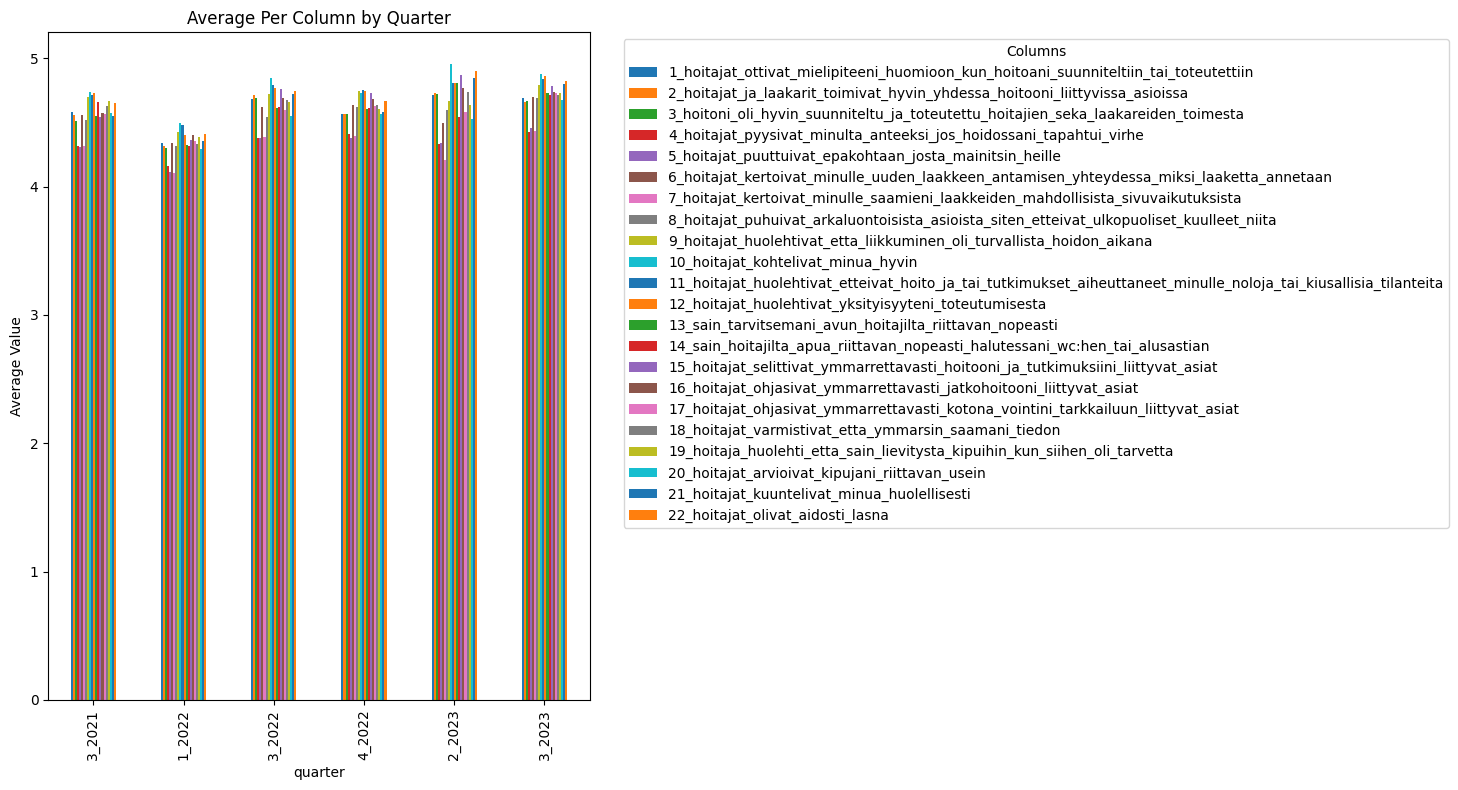

In [17]:
plt.figure(figsize=(15, 8))

# Plot each column as grouped bars
grouped_averages.plot(
    x="quarter",  # Quarter on x-axis
    kind="bar",   # Bar chart
    figsize=(15, 8),
    title="Average Per Column by Quarter",
    ylabel="Average Value"
)

# Add legend and adjust layout
plt.legend(title="Columns", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

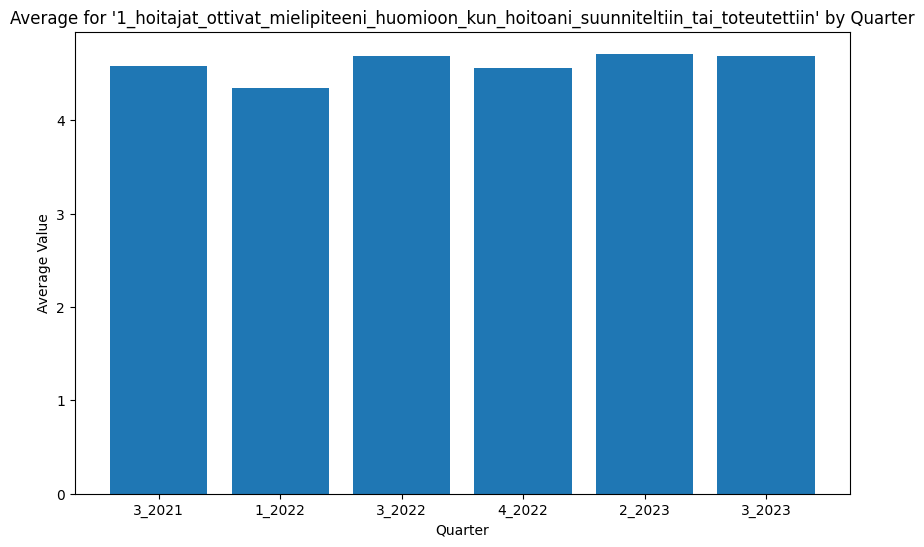

In [18]:
# Example: Plot average for one column
specific_column = "1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin"

plt.figure(figsize=(10, 6))
plt.bar(grouped_averages["quarter"], grouped_averages[specific_column])
plt.title(f"Average for '{specific_column}' by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Average Value")
plt.show()

In [19]:
#import seaborn as sns
#
## Heatmap of averages
#plt.figure(figsize=(12, 8))
#sns.heatmap(grouped_averages.set_index("quarter_period"), annot=True, cmap="Blues", fmt=".2f")
#plt.title("Average Values by Quarter")
#plt.ylabel("Quarter")
#plt.xlabel("Columns")
#plt.show()

# Puuttuvien kvartaalien lisäys HOPP-datajoukkoon

Kooste datajoukosta (kansallinen kooste), etsitään  kvartaalit joukkoerotuksella, joita ei löydy HOPP_kyselyjoukosta. Puuttuvia kvartaaleja löytyi yhteensä kolme, (02_2022, 04_2021, 01_2023). Kun Kainuun datajoukosta puuttuvat kvartaalit on löydetty, etsitään seuraavaksi yhteiset kvartaalit, set-luokan kahden joukon leikkausmetodia käyttäen (&). 

Data ryhmitellän kvartaalittain ja lasketaan kaikkien kysmysten keskiarvot, molemmista datajoukoista (kooste ja Kainuu). Lasketaan Kainuun ja koosteen yhteisten kvartaalien arvojen erotus, jota käytetään puuttuvien kvartaalien korjauskertoimena. Lisätään korjauskertoimet kooste-datajoukon apumuuttujaan ja lisätään uudet rivit Kainuun datajoukkoot. Maximi arvo asetetaan viiteen (clip).

In [20]:
# standardoidaan kvartaali (bugi kultaputken standardoinnissa)
df_g['quarter'] = df_g['quarter'].str.replace('.0_', '_', regex=False)

# Split the dataset into kainuu and kooste
kainuu_df = df_g[df_g['datajoukko'] == 'kainuu']
kooste_df = df_g[df_g['datajoukko'] == 'kooste']

# Identify missing quarters in kainuu
kainuu_quarters = set(kainuu_df['quarter'])
kooste_quarters = set(kooste_df['quarter'])
missing_quarters = list(kooste_quarters - kainuu_quarters)

# Group "kooste" by quarter and calculate mean
kooste_grouped = kooste_df.groupby('quarter').mean(numeric_only=True)

# Calculate averages for common quarters
common_quarters = list(kainuu_quarters & kooste_quarters)
kooste_avg_common = kooste_grouped.loc[common_quarters].mean()
kainuu_avg_common = kainuu_df[kainuu_df['quarter'].isin(common_quarters)].mean(numeric_only=True)

# Lasketaan korjauskerroin kainuu vs kaikki
correction = kainuu_avg_common - kooste_avg_common
print(correction)
# Lisätään korjaus arvoihin. Asteikko 0-5 joten yksinkertainen lisäys toimii
missing_kooste_averages = kooste_grouped.loc[missing_quarters]
corrected_values = missing_kooste_averages.add(correction, axis=1)


# max tyytyväisyys = 5
corrected_values = corrected_values.clip(upper=5)
# Uudet rivit kainuun datajoukolle
new_rows = corrected_values.reset_index()
new_rows['datajoukko'] = 'kainuu'
print(new_rows)
# Append the corrected rows to kainuu dataset
kainuu_df = pd.concat([kainuu_df, new_rows], ignore_index=True)

kainuu_df = kainuu_df.fillna(method='bfill')
kainuu_df



1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                0.229466
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         0.379559
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   0.231324
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  0.091952
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             0.647000
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            0.056491
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista                                    0.183614
8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita                            0.285641


/tmp/ipykernel_123556/3829292618.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  kainuu_df = kainuu_df.fillna(method='bfill')


quarter datajoukko  \
0  01_2022     kainuu   
1  02_2023     kainuu   
2  03_2021     kainuu   
3  03_2022     kainuu   
4  03_2023     kainuu   
5  04_2022     kainuu   
6  04_2021     kainuu   
7  01_2023     kainuu   
8  02_2022     kainuu   

   1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
0                                           4.500000                                      
1                                           4.615385                                      
2                                           4.800000                                      
3                                           4.706667                                      
4                                           4.200000                                      
5                                           4.444444                                      
6                                           4.459466                                      
7                                           4.796132                                      
8                                           4.566132                                      

   2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
0                                           4.727273                             
1                                           4.666667                             
2                                           4.647059                             
3                                           4.750000                             
4                                           4.000000                             
5                                           4.538462                             
6                                           4.839559                             
7                                           5.000000                             
8                                           4.782892                             

   3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
0                                           4.454545                                   
1                                           4.545455                                   
2                                           4.611111                                   
3                                           4.652174                                   
4                                           3.952381                                   
5                                           4.375000                                   
6                                           4.561324                                   
7                                           4.816324                                   
8                                           4.554657                                   

   4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
0                                           4.000000                    
1                                           3.333333                    
2                                           4.571429                    
3                                           4.533333                    
4                                           4.444444                    
5                                           3.333333                    
6                                           4.056952                    
7                                           4.531952                    
8                                           4.221952                    

   5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
0                                           5.000000         
1                                           3.500000         
2                                           4.500000         
3                                           4.400000         
4                                           4.076923         
5                                   

In [21]:
kainuu_df.isna().sum()

quarter                                                                                                             0
datajoukko                                                                                                          0
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin                                0
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa                                         0
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta                                   0
4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe                                                  0
5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille                                                             0
6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan                            0
7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdoll

In [22]:
kooste_df

quarter datajoukko  \
0  01_2022     kooste   
1  01_2023     kooste   
2  02_2022     kooste   
3  02_2023     kooste   
4  03_2021     kooste   
5  03_2022     kooste   
6  04_2021     kooste   
7  04_2022     kooste   

   1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
0                                           4.150000                                      
1                                           4.566667                                      
2                                           4.336667                                      
3                                           4.340000                                      
4                                           4.476667                                      
5                                           4.560000                                      
6                                           4.230000                                      
7                                           4.392500                                      

   2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
0                                           4.073333                             
1                                           4.640000                             
2                                           4.403333                             
3                                           4.375000                             
4                                           4.253333                             
5                                           4.483333                             
6                                           4.460000                             
7                                           4.246667                             

   3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
0                                           4.046667                                   
1                                           4.585000                                   
2                                           4.323333                                   
3                                           4.315000                                   
4                                           4.270000                                   
5                                           4.530000                                   
6                                           4.330000                                   
7                                           4.320000                                   

   4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
0                                           3.680000                    
1                                           4.440000                    
2                                           4.130000                    
3                                           4.015000                    
4                                           4.040000                    
5                                           4.076667                    
6                                           3.965000                    
7                                           3.500000                    

   5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
0                                           3.496667         
1                                           3.940000         
2                                           3.845000         
3                                           3.653333         
4                                           3.353333         
5                                           4.025000         
6                                           3.880000         
7                                           3.303333         

   6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan  \
0                                           4.336667                                          
1                 

   quarter datajoukko  \
2  03_2021     kainuu   
6  04_2021     kainuu   
0  01_2022     kainuu   
8  02_2022     kainuu   
3  03_2022     kainuu   
5  04_2022     kainuu   
7  01_2023     kainuu   
1  02_2023     kainuu   
4  03_2023     kainuu   

   1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
2                                           4.800000                                      
6                                           4.459466                                      
0                                           4.500000                                      
8                                           4.566132                                      
3                                           4.706667                                      
5                                           4.444444                                      
7                                           4.796132                                      
1                    

/tmp/ipykernel_123556/3872136657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kooste_df['period'] = kooste_df['quarter'].apply(lambda x: f"{x[-4:]}Q{x[:2].lstrip('0')}")
/tmp/ipykernel_123556/3872136657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kooste_df['period'] = pd.PeriodIndex(kooste_df['period'], freq='Q')
/tmp/ipykernel_123556/3872136657.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

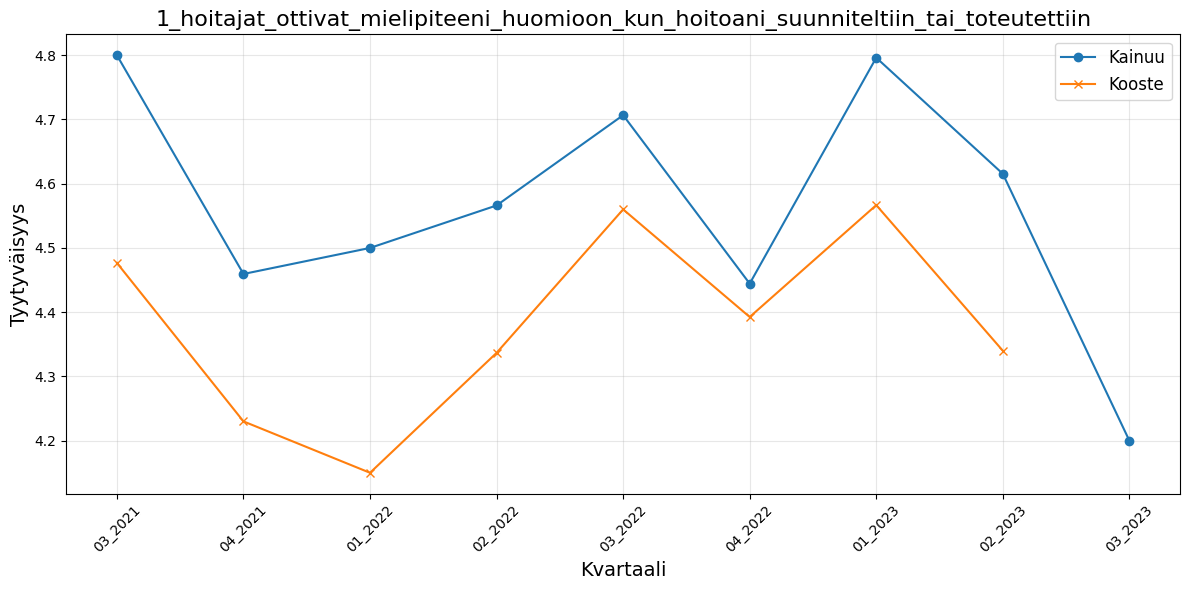

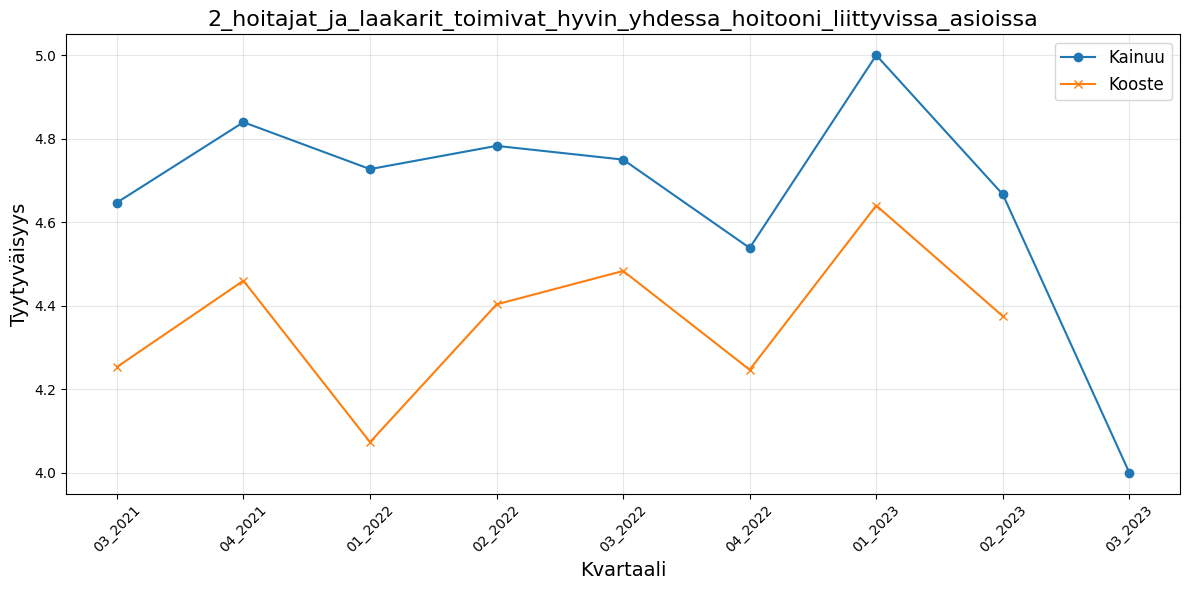

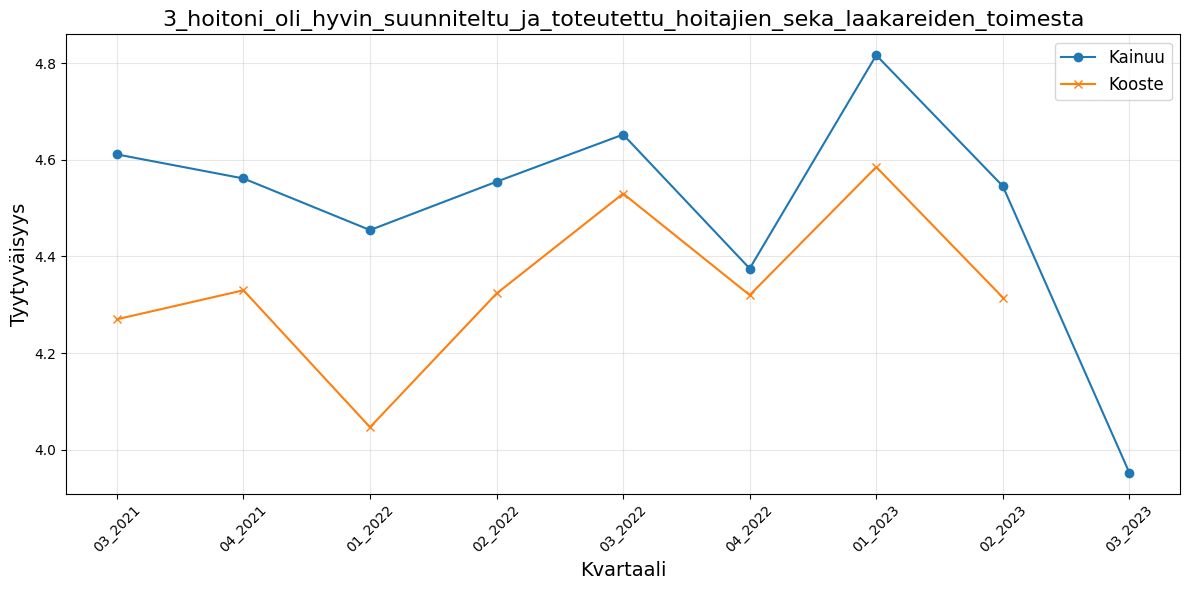

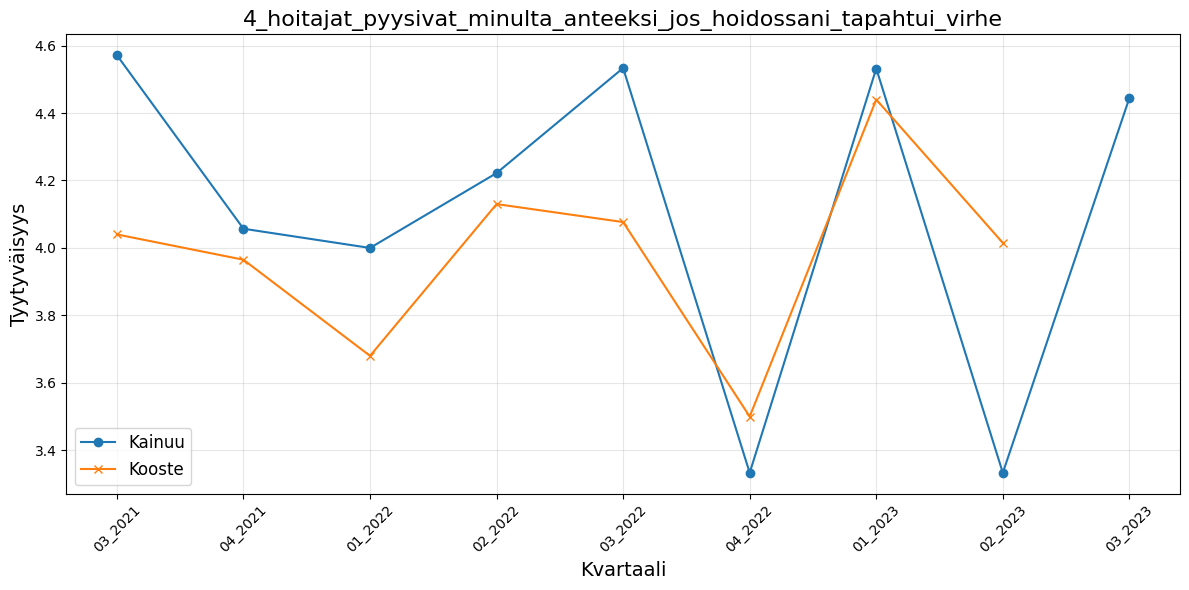

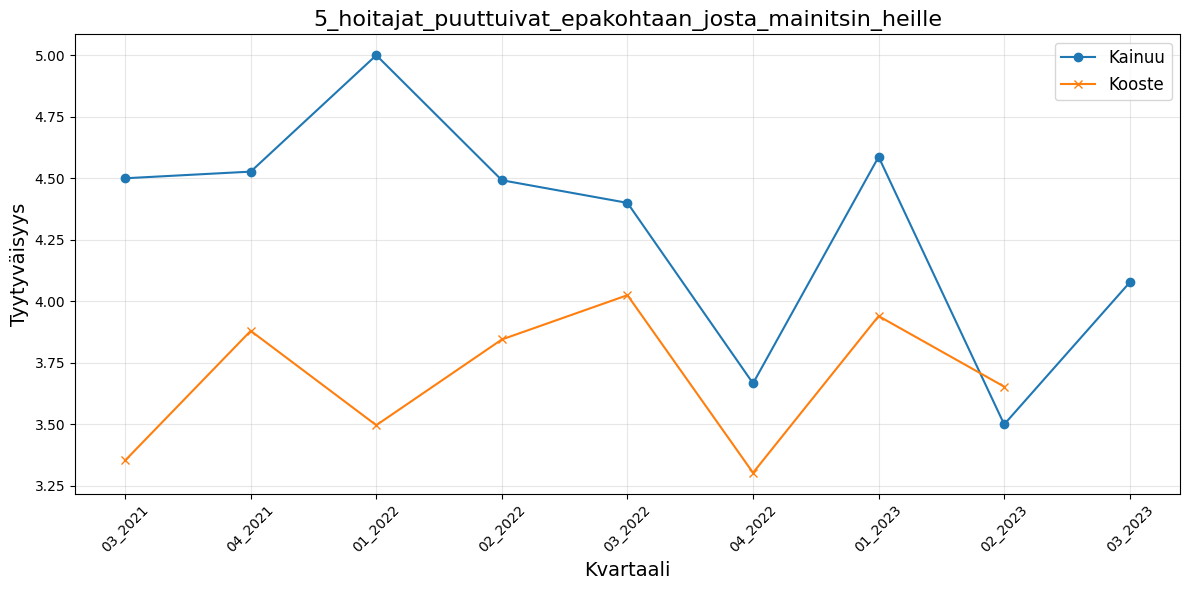

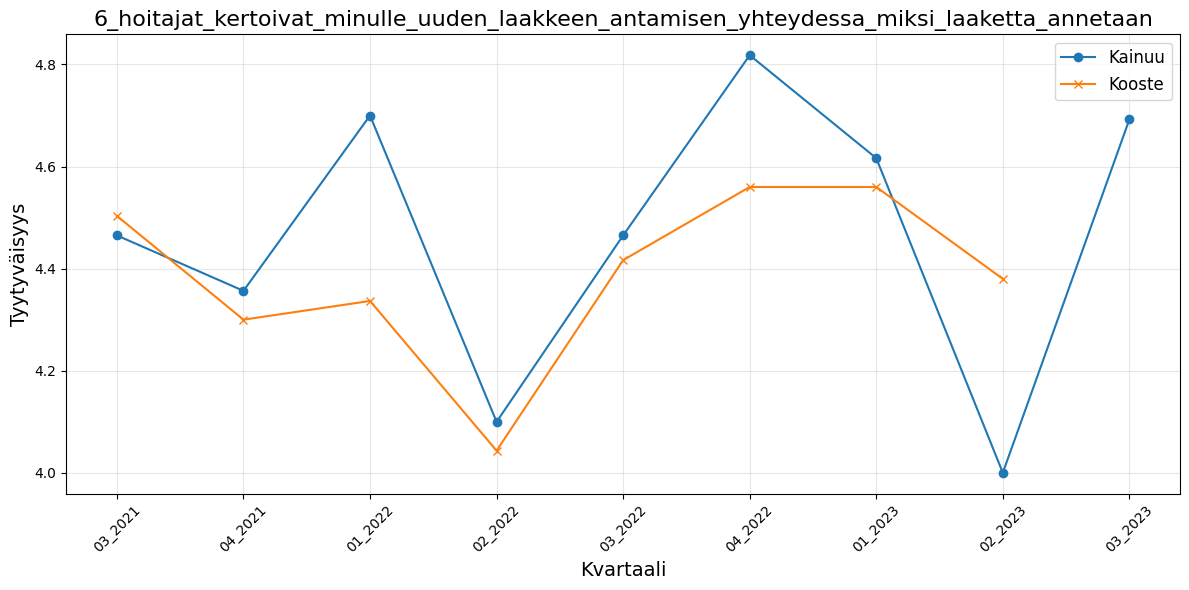

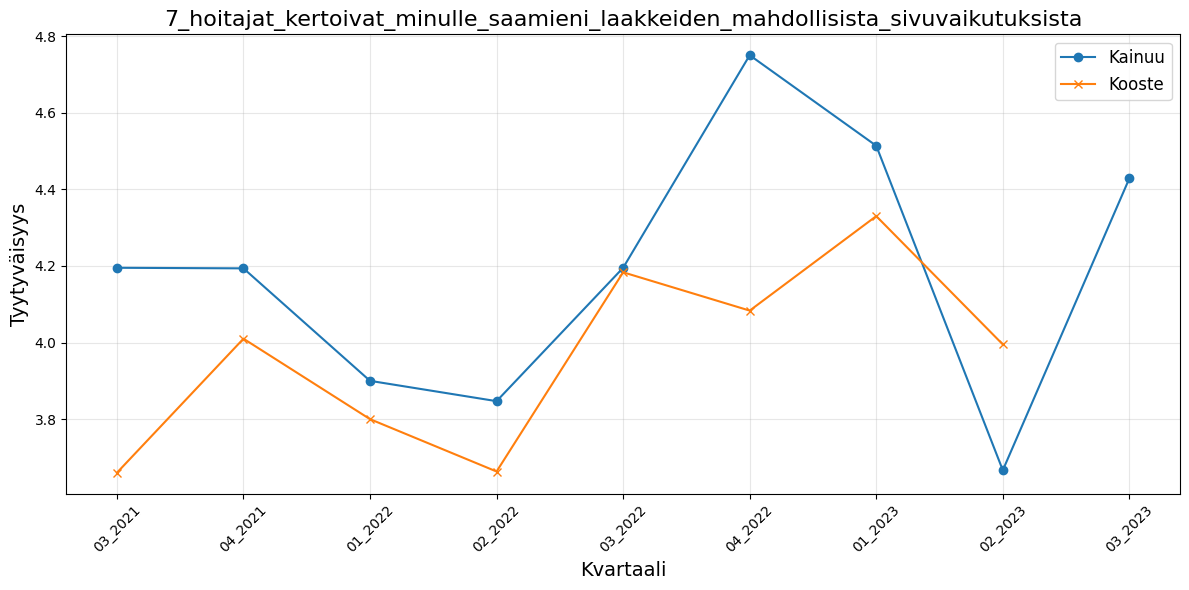

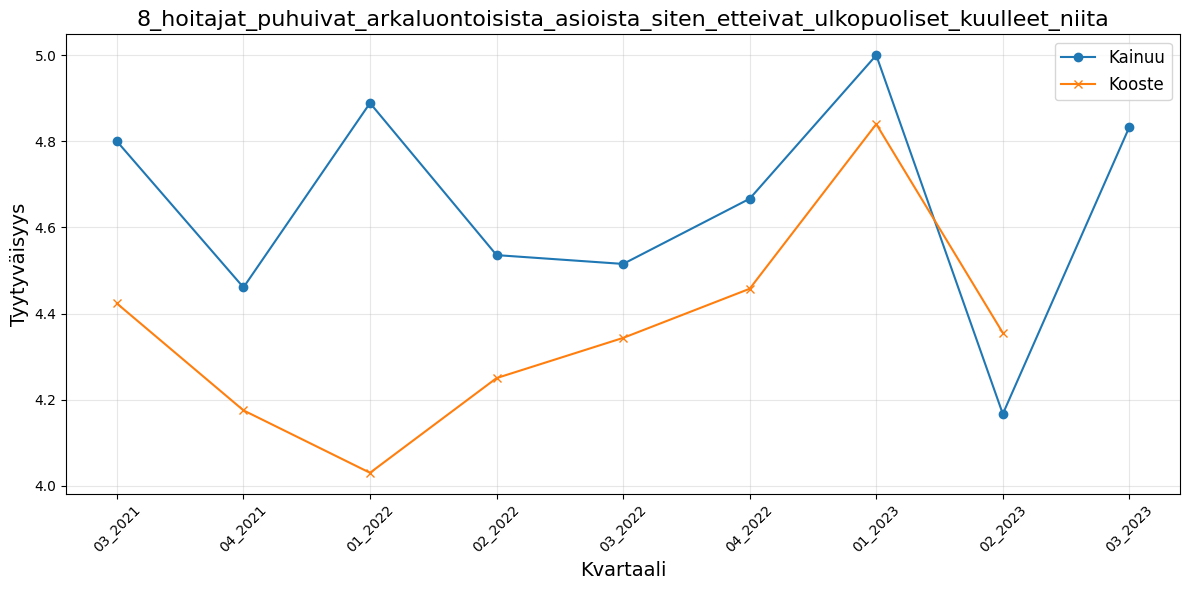

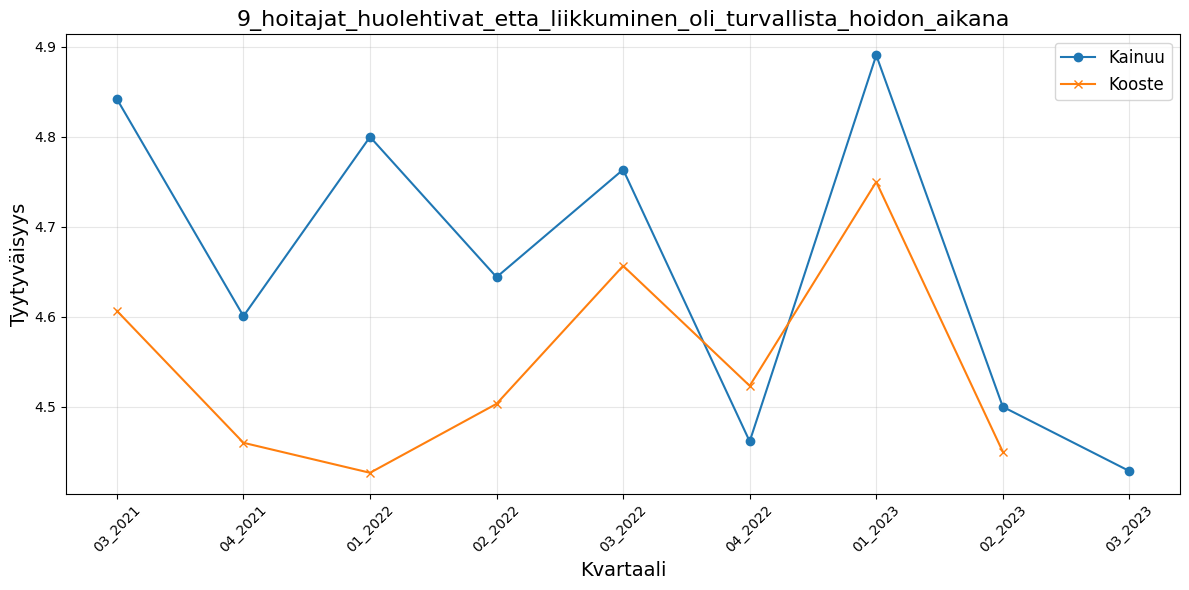

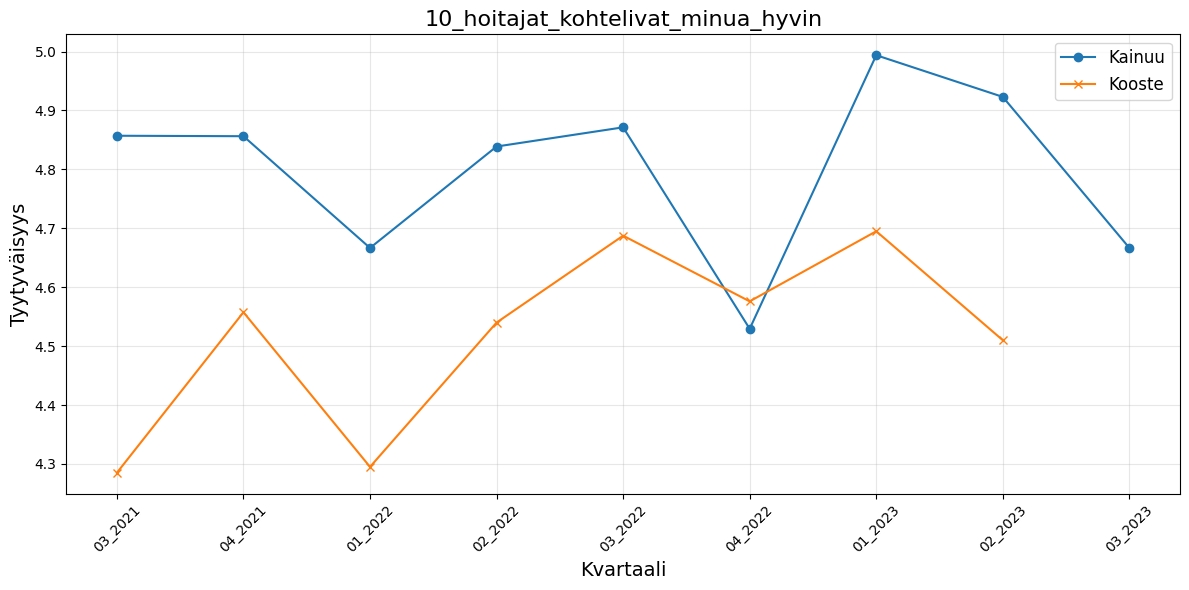

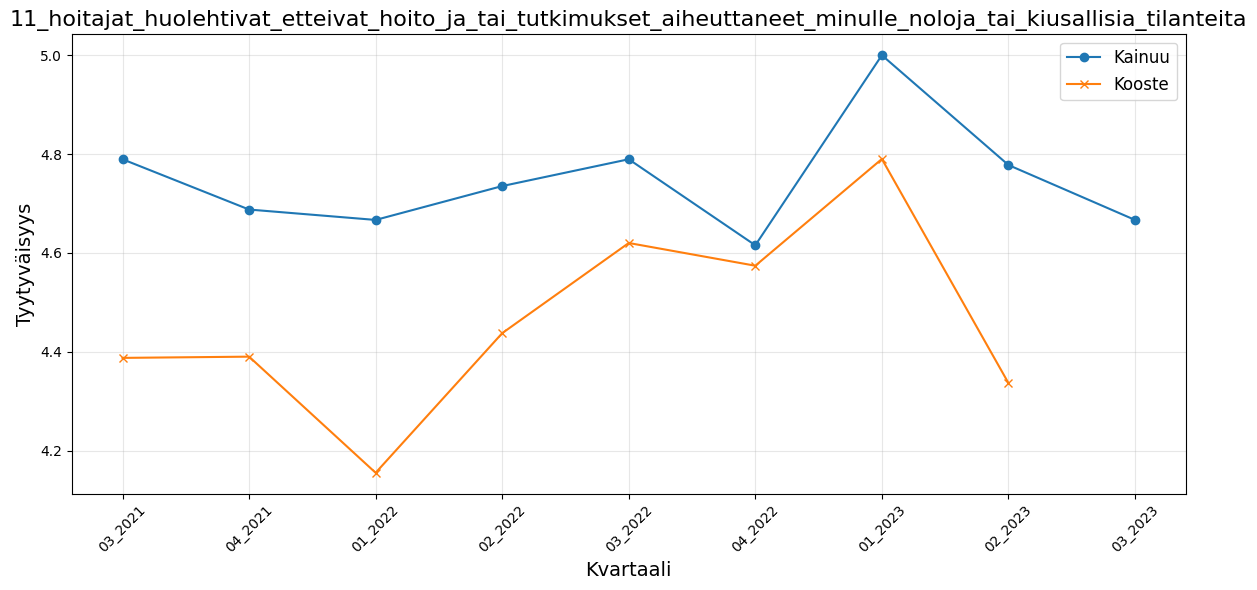

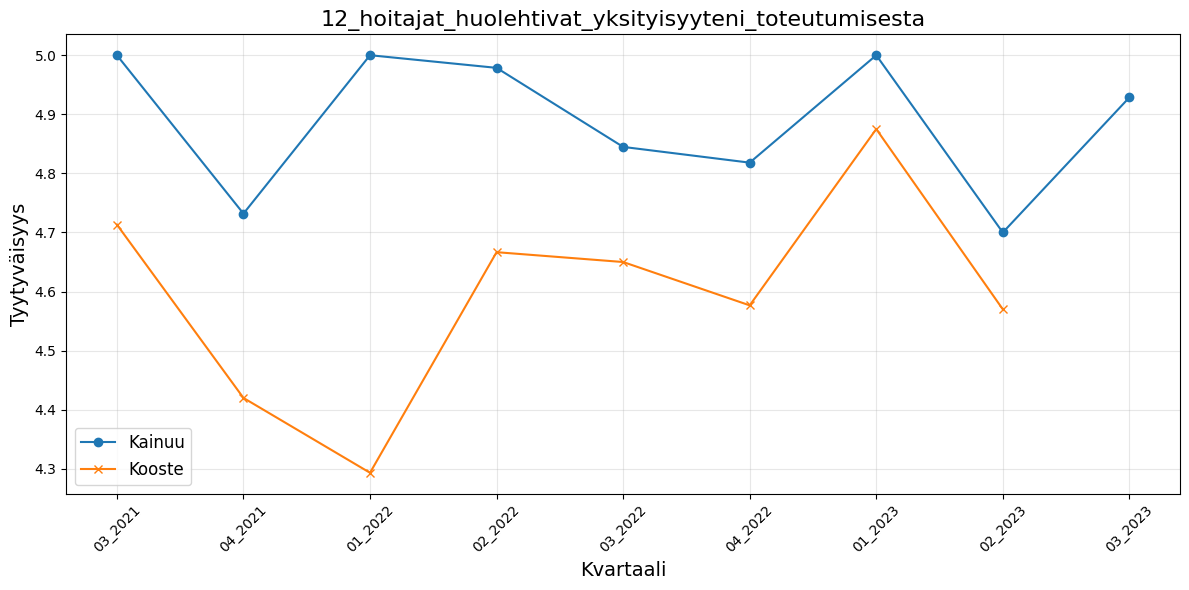

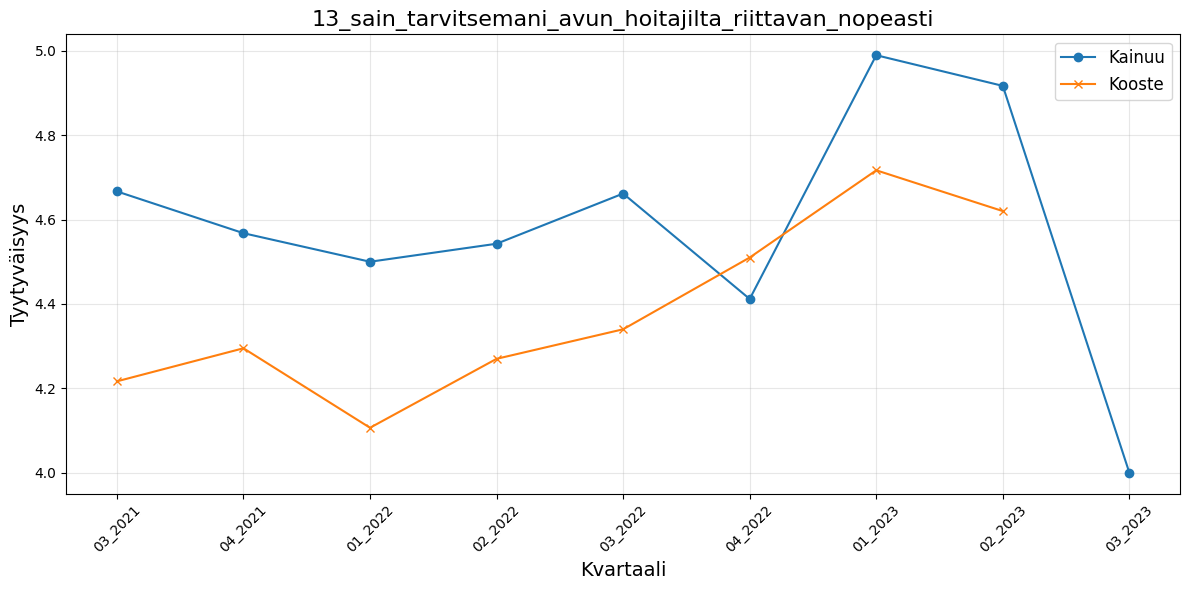

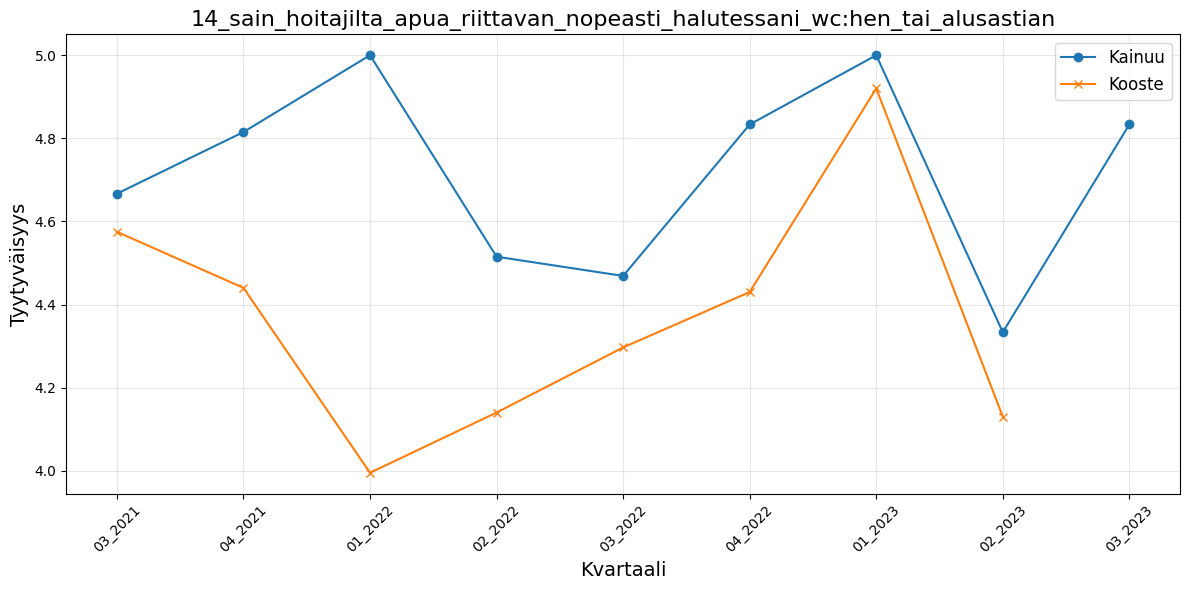

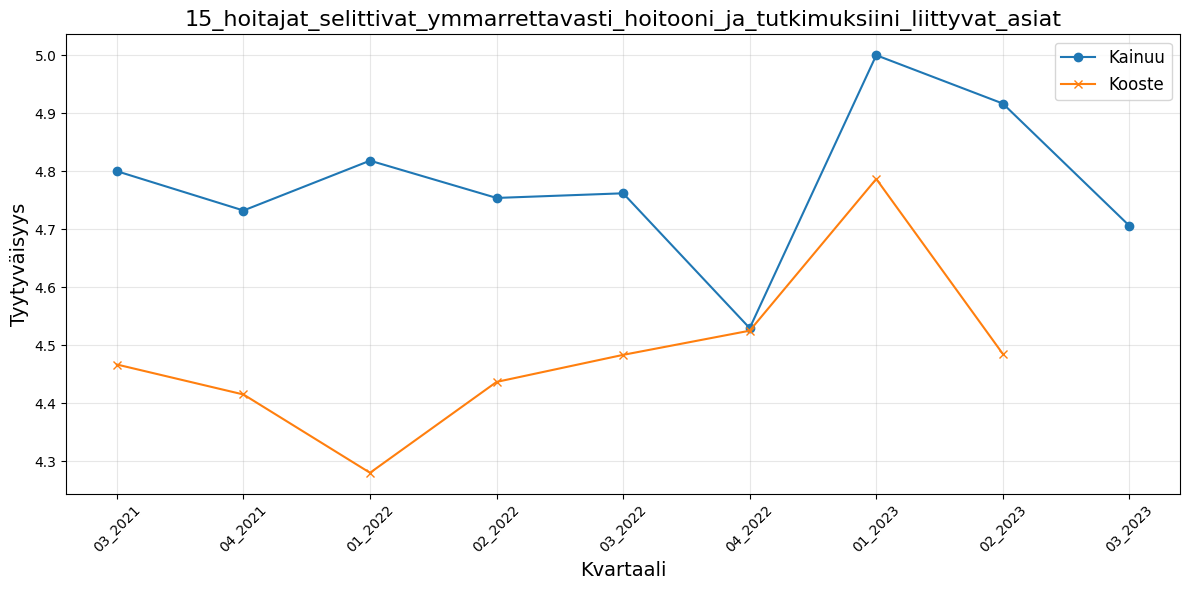

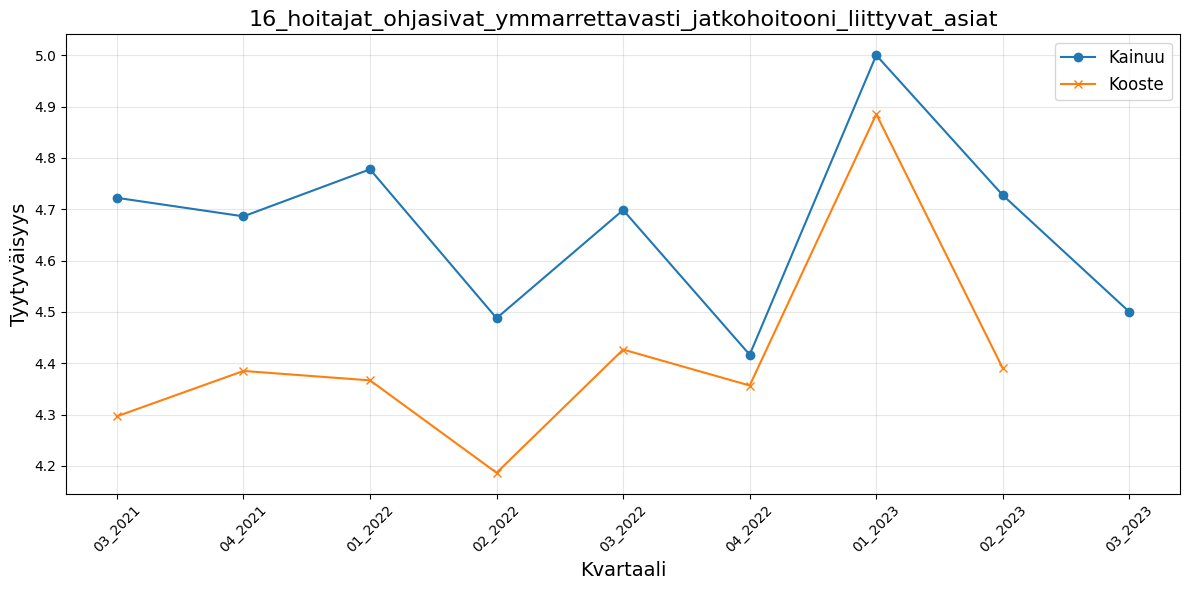

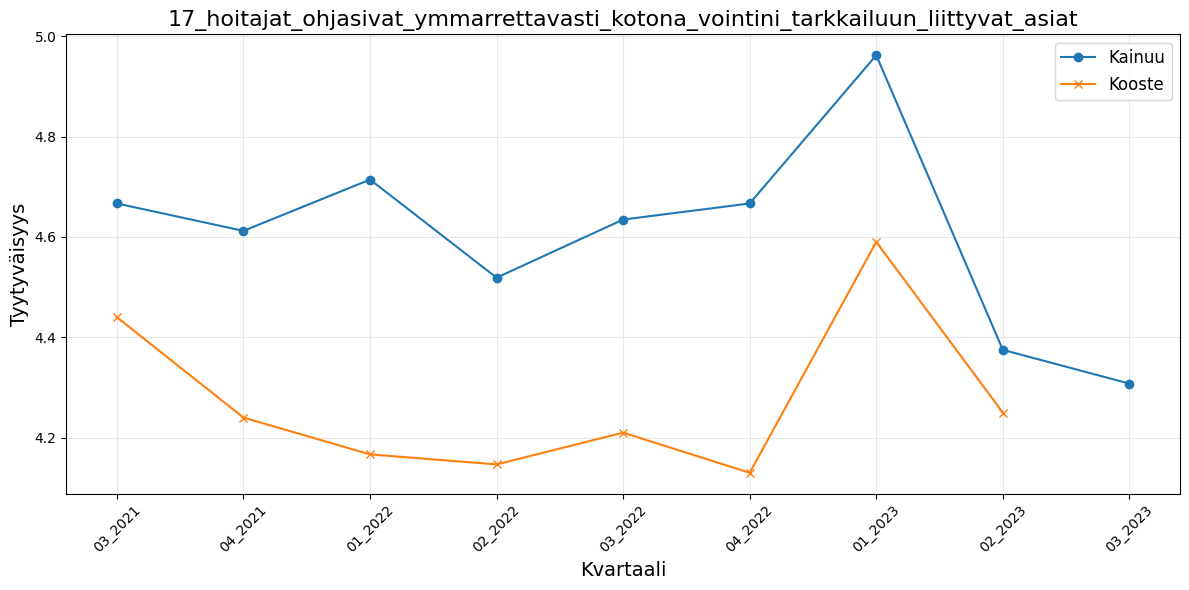

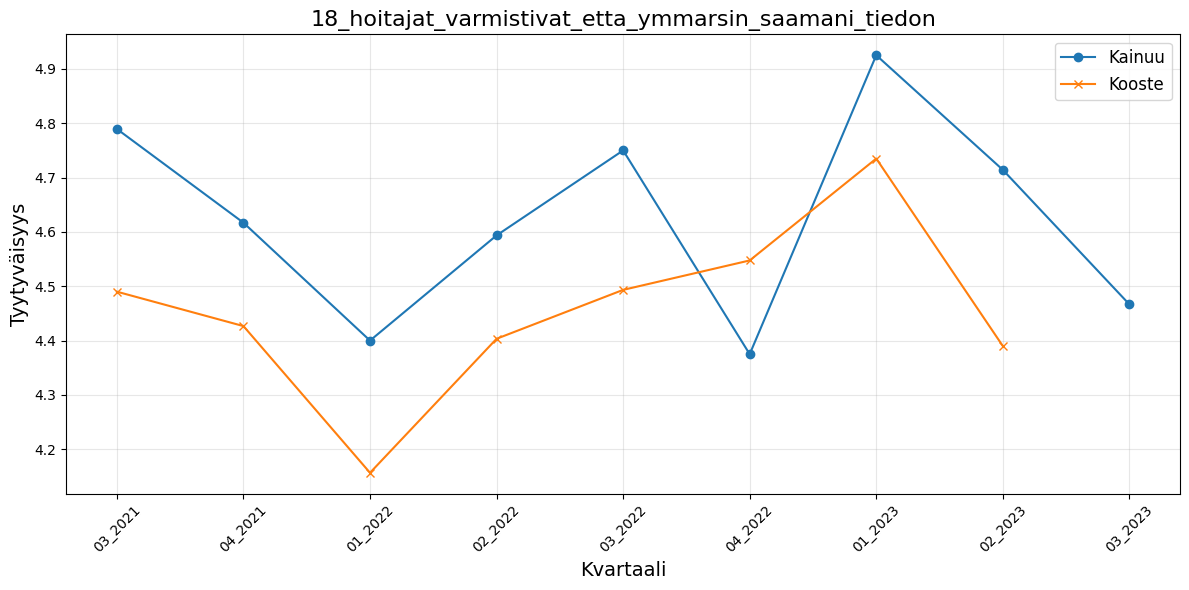

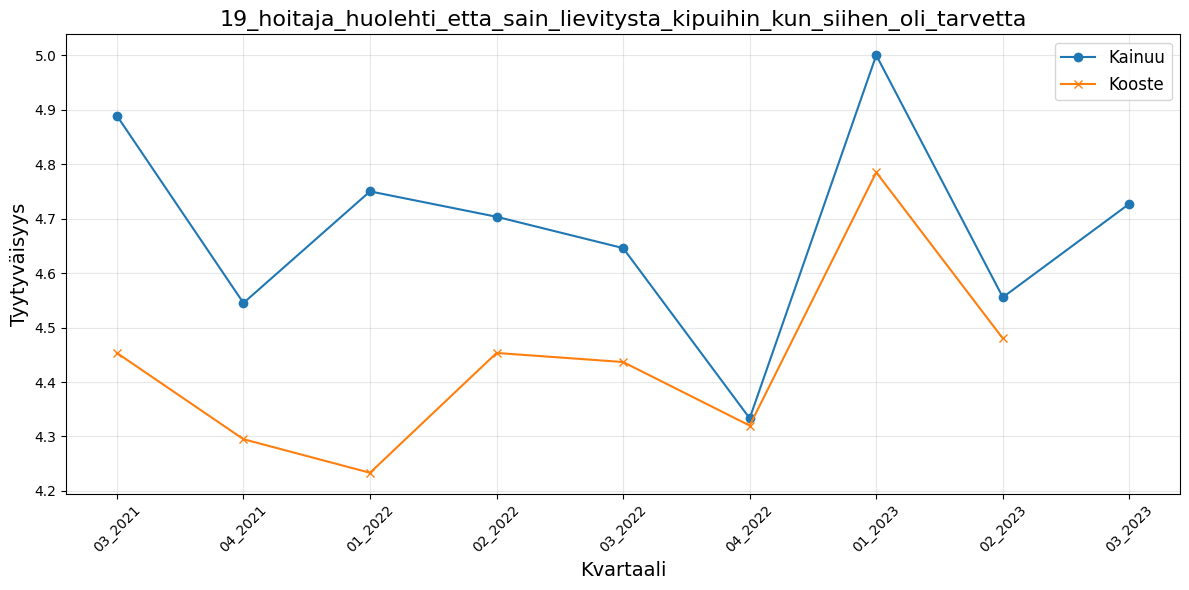

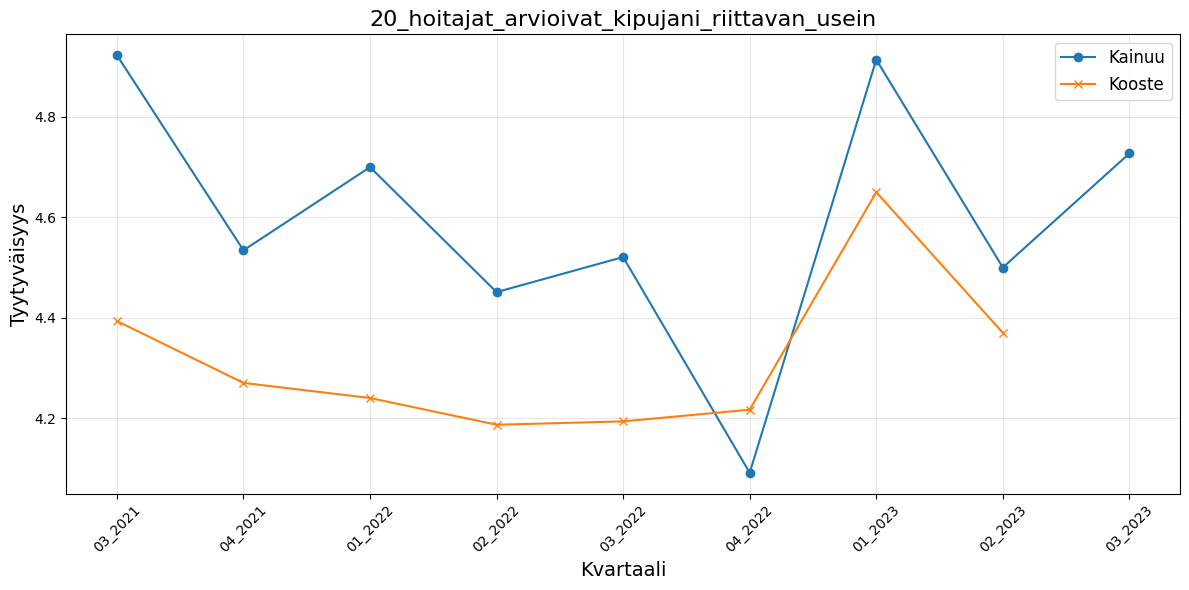

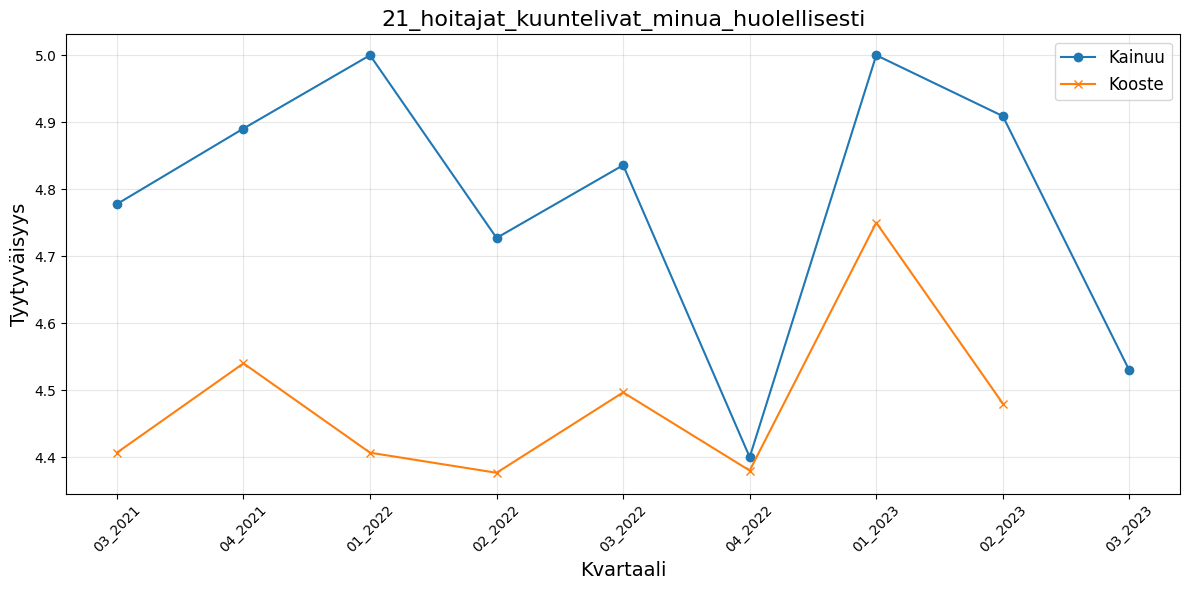

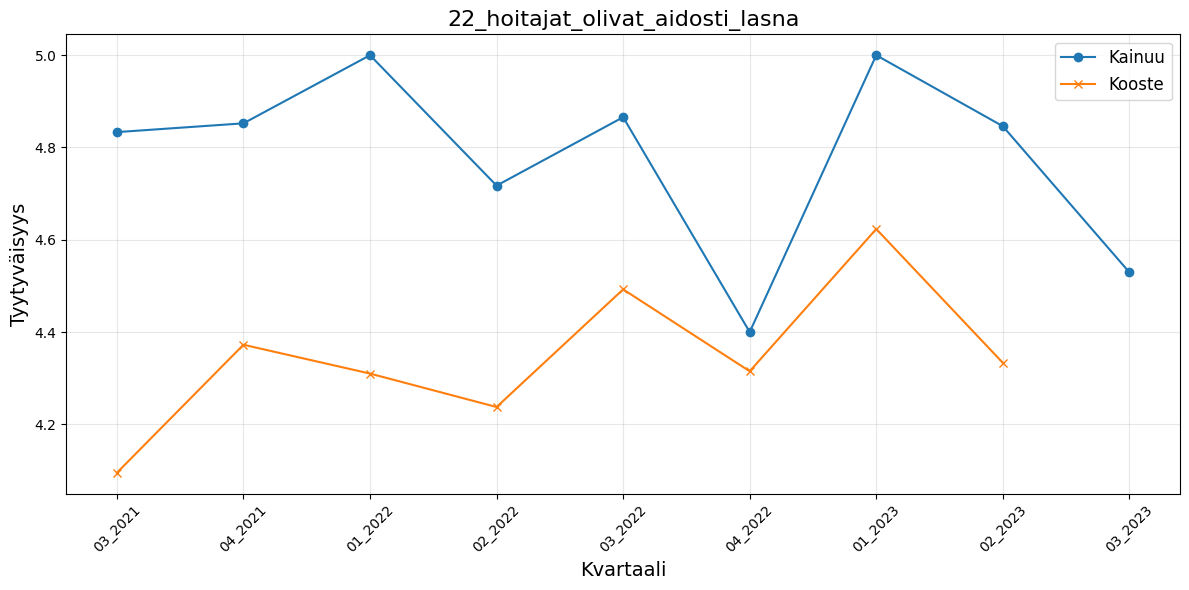

In [23]:
# grouping both datasets by 'quarter' and calculating mean for plotting
#kainuu_df = kainuu_df.groupby('quarter').mean(numeric_only=True)
#kooste_df = kooste_df.groupby('quarter').mean(numeric_only=True)
drop_columns = ['_ts', '/medallion', '_etag', '_attachments', '_self', 'id', '_rid']

#kooste_df = kooste_df.reset_index()
#kainuu_df = kainuu_df.reset_index()


kooste_df['period'] = kooste_df['quarter'].apply(lambda x: f"{x[-4:]}Q{x[:2].lstrip('0')}")
kainuu_df['period'] = kainuu_df['quarter'].apply(lambda x: f"{x[-4:]}Q{x[:2].lstrip('0')}")
kooste_df['period'] = pd.PeriodIndex(kooste_df['period'], freq='Q')
kainuu_df['period'] = pd.PeriodIndex(kainuu_df['period'], freq='Q')

kainuu_df.sort_values(by='period', inplace=True)
kooste_df.sort_values(by='period', inplace=True)

kainuu_df.drop(drop_columns, axis=1, inplace=True)
kooste_df.drop(drop_columns, axis=1, inplace= True)
print(kainuu_df)



# Plotting each numeric column against 'quarter' for both datasets
for column in kainuu_df.columns[2:-1]:
    plt.figure(figsize=(12, 6))
    
    # Plot Kainuu
    plt.plot(kainuu_df['quarter'], kainuu_df[column], label='Kainuu', marker='o')
    
    # Plot Kooste
    plt.plot(kooste_df['quarter'], kooste_df[column], label='Kooste', marker='x')
    
  
    # Adding titles and labels
    plt.title(f"{column}", fontsize=16)
    plt.xlabel("Kvartaali", fontsize=14)
    plt.ylabel("Tyytyväisyys", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    # Display plot
    plt.show()

# Lagged arvojen luonti ja feature engineering

In [24]:
# adding year column
kainuu_df['year'] = kainuu_df['period'].dt.year

# yearly healthcare budget billion (miljardia)
yearly_budget = {
    2021: 24651,
    2022: 25925,
    2023: 25600
}

# yearly workforce in healthcare
yearly_workforce = {
    2021: 126537,
    2022: 127745,
    2023: 129745
}

# Sote reform
sote = {
    2021: 0,
    2022: 0,
    2023: 1
}

kainuu_df['yearly_budget'] = kainuu_df['year'].map(yearly_budget)
kainuu_df['yearly_workforce'] = kainuu_df['year'].map(yearly_workforce)
kainuu_df['sote'] = kainuu_df['year'].map(sote)
kainuu_df['quarterly_budget'] = kainuu_df['yearly_budget'] / 4
kainuu_df['quarterly_workforce'] = kainuu_df['yearly_workforce'] / 4

# drop unnecessary columns

# Identify numerical columns for feature engineering
metric_columns = kainuu_df.select_dtypes(include='float64').columns
lagged_features = kainuu_df.copy()
target_columns = []

# Adding lagged features (1)
for column in metric_columns:
    lagged_features[f'{column}_lag1'] = lagged_features[column].shift(1)
    target_columns.append(column)
target_columns.append('sote')
lagged_features['sote_lag1'] = lagged_features['sote'].shift(1)
# Drop rows with NaN values introduced by lagging
lagged_features.dropna(inplace=True)

# Käytetään lagged arvoja ennnustukseen (featuret) ja nykyisiä arvoja eri ennustettavaan arvoon (target)
target_column = '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa'
lagged_columns = [col for col in lagged_features.columns if 'lag1' in col]

print(lagged_columns)
target_columns

['1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin_lag1', '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa_lag1', '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta_lag1', '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe_lag1', '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille_lag1', '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan_lag1', '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista_lag1', '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita_lag1', '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana_lag1', '10_hoitajat_kohtelivat_minua_hyvin_lag1', '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita_lag1', '12_hoitajat_huolehtivat_yksityisyyteni_toteutumisesta_lag1', '13_sa

['1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin',
 '2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa',
 '3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta',
 '4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe',
 '5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille',
 '6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan',
 '7_hoitajat_kertoivat_minulle_saamieni_laakkeiden_mahdollisista_sivuvaikutuksista',
 '8_hoitajat_puhuivat_arkaluontoisista_asioista_siten_etteivat_ulkopuoliset_kuulleet_niita',
 '9_hoitajat_huolehtivat_etta_liikkuminen_oli_turvallista_hoidon_aikana',
 '10_hoitajat_kohtelivat_minua_hyvin',
 '11_hoitajat_huolehtivat_etteivat_hoito_ja_tai_tutkimukset_aiheuttaneet_minulle_noloja_tai_kiusallisia_tilanteita',
 '12_hoitajat_huolehtivat_yksityisyyteni_toteutumisesta',
 '13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeas

# Random Forest Regressor

In [25]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


X = lagged_features[lagged_columns]
y = lagged_features[target_column]

# Time-series split for backtesting
tscv = TimeSeriesSplit(n_splits=7)

predictions = []
actuals = []


for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Train on (idx): ", train_index)
    print("Test on (future Q idx); ", test_index)
    # Koulutetaan Random Forest Regressor
    model = RandomForestRegressor(n_estimators=6, random_state=42, max_depth=5, min_samples_split=2)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)

    predictions.extend(y_pred)
    actuals.extend(y_test)
    
    # Evaluate performance on this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Fold RMSE: {rmse:.2f}")

# Step 4: Overall performance
overall_rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Overall RMSE: {overall_rmse:.2f}")

Train on (idx):  [0]
Test on (future Q idx);  [1]
Fold RMSE: 0.11
Train on (idx):  [0 1]
Test on (future Q idx);  [2]
Fold RMSE: 0.00
Train on (idx):  [0 1 2]
Test on (future Q idx);  [3]
Fold RMSE: 0.01
Train on (idx):  [0 1 2 3]
Test on (future Q idx);  [4]
Fold RMSE: 0.24
Train on (idx):  [0 1 2 3 4]
Test on (future Q idx);  [5]
Fold RMSE: 0.22
Train on (idx):  [0 1 2 3 4 5]
Test on (future Q idx);  [6]
Fold RMSE: 0.03
Train on (idx):  [0 1 2 3 4 5 6]
Test on (future Q idx);  [7]
Fold RMSE: 0.69
Overall RMSE: 0.29


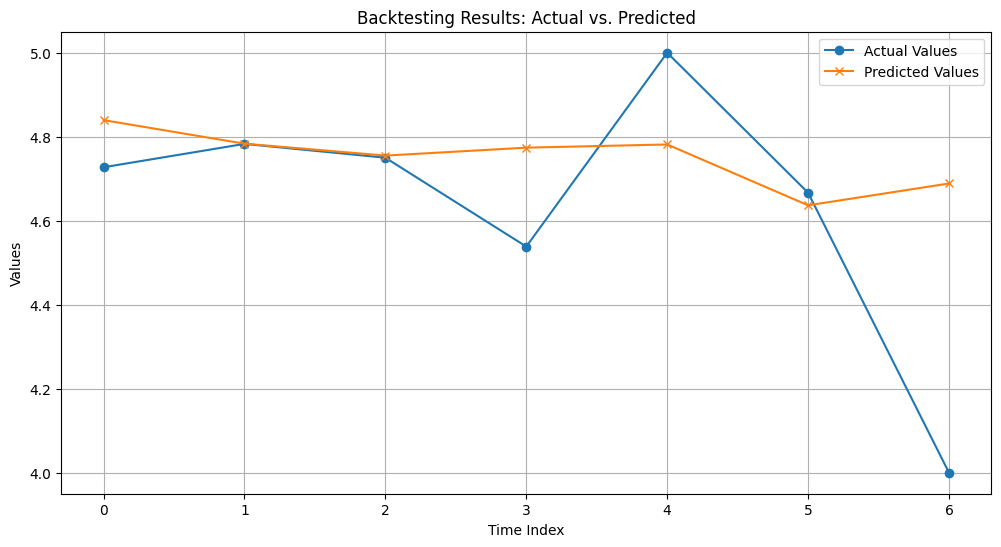

In [26]:
results_df = pd.DataFrame({
    'Actual': actuals,
    'Predicted': predictions
})
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual Values', marker='o')
plt.plot(results_df['Predicted'], label='Predicted Values', marker='x')
plt.title('Backtesting Results: Actual vs. Predicted')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# CNN


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Tiputa jos et halua lisäfeatureita ##
#lagged_features.drop(['quarterly_budget_lag1', 'quarterly_workforce_lag1', 'sote_lag1'], axis=1, inplace=True)
#lagged_columns = [x for x in lagged_columns if x not in ['quarterly_budget_lag1', 'quarterly_workforce_lag1', 'sote_lag1']]


## Jos tiputit, poista skaalaus ##
# Skaalaa isot budjetit 
columns_to_downscale = ['quarterly_budget_lag1', 'quarterly_workforce_lag1']
lagged_features[columns_to_downscale] = np.log1p(lagged_features[columns_to_downscale])


# Convert data to NumPy arrays for easier manipulation
X = lagged_features[lagged_columns].values

y = lagged_features[target_column].values

X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

# Reshape the data to fit the CNN input format: (samples, timesteps, features)
# Here, timesteps = 1 (each lag is treated as an independent timestep)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, 1 timestep, features

lagged_features[columns_to_downscale]

quarterly_budget_lag1  quarterly_workforce_lag1
6               8.726441                 10.362027
0               8.726441                 10.362027
8               8.776823                 10.371528
3               8.776823                 10.371528
5               8.776823                 10.371528
7               8.776823                 10.371528
1               8.764210                 10.387063
4               8.764210                 10.387063

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_scaled.shape[2])),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

2024-12-14 15:25:12.877330: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 15:25:12.879892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 15:25:12.885416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734182712.896559  123556 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734182712.899982  123556 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 15:25:12.912600: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


tscv = TimeSeriesSplit(n_splits=7)
predictions = []
actuals = []

for train_index, test_index in tscv.split(X_scaled):
    # Split the data
    X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]

    y_train, y_test = y[train_index], y[test_index]

    y_scaler = MinMaxScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()


    # Train the model
    model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=2, verbose=0)
    
    # Predict
    y_pred_scaled = model.predict(X_test_scaled).flatten()
    
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Store results
    predictions.extend(y_pred)
    actuals.extend(y_test)
    
    # Evaluate fold performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Fold RMSE: {rmse:.2f}")

# Overall performance
overall_rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Overall RMSE: {overall_rmse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Fold RMSE: 0.06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold RMSE: 0.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold RMSE: 0.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold RMSE: 0.22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold RMSE: 0.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold RMSE: 0.13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold RMSE: 0.46
Overall RMSE: 0.26


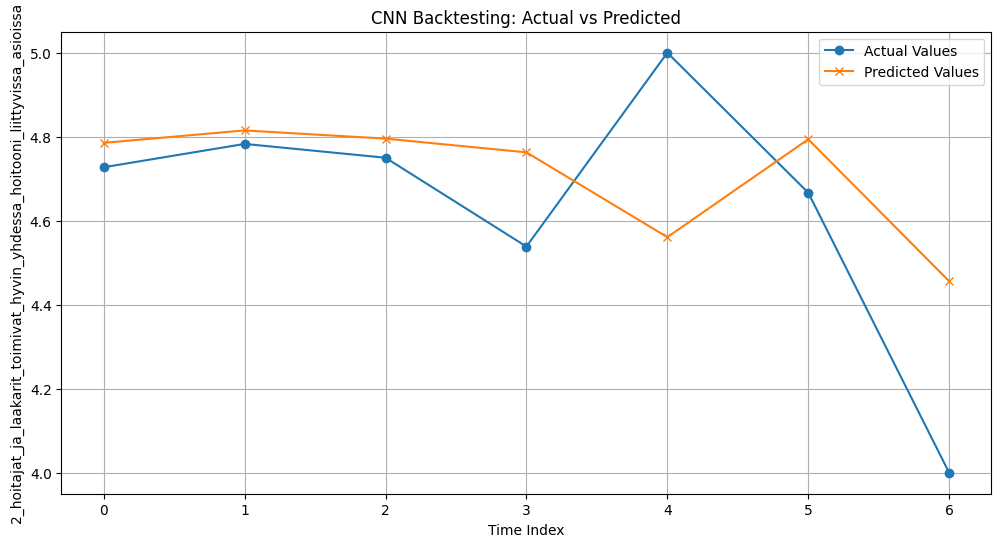

In [30]:

# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual Values', marker='o')
plt.plot(predictions, label='Predicted Values', marker='x')
plt.title('CNN Backtesting: Actual vs Predicted')
plt.xlabel('Time Index')
plt.ylabel(target_column)
plt.legend()
plt.grid(True)
plt.show()

# Predict future with CNN

In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Prepare Data
X = lagged_features[lagged_columns].values  # Input features (lagged)
y = lagged_features[lagged_columns].values  # Target variables (future steps)

# Scale globally
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# Reshape X for CNN
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, timesteps, features)

# Define the Model
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_scaled.shape[2])),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_scaled.shape[1], activation='linear')  # Predict all target variables
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Cross-Validation
tscv = TimeSeriesSplit(n_splits=6)
predictions = []
actuals = []

for fold, (train_index, test_index) in enumerate(tscv.split(X_scaled)):
    # Split data
    X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
    y_train_scaled, y_test_scaled = y_scaled[train_index], y_scaled[test_index]

    # Train the model
    model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=10, verbose=0)

    # Predict
    y_pred_scaled = model.predict(X_test_scaled)

    # Store results
    predictions.extend(y_pred_scaled)
    actuals.extend(y_test_scaled)

    # Evaluate fold performance
    fold_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.2f}")

# Overall performance
overall_rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Overall RMSE: {overall_rmse:.2f}")

/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Fold 1 RMSE: 0.69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 2 RMSE: 0.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 3 RMSE: 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4 RMSE: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5 RMSE: 0.77
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fold 6 RMSE: 0.51
Overall RMSE: 0.58


In [32]:
# future dataset
predictions = np.array(predictions)
actuals = np.array(actuals)
#predictions.reshape(1,-1)
print(predictions.shape)
# Inverse transform if scaled (use y_scaler for targets)
predictions_original = y_scaler.inverse_transform(predictions)
actuals_original = X_scaler.inverse_transform(actuals)

# Create DataFrames for predictions and actuals
predictions_df = pd.DataFrame(predictions_original, columns=lagged_columns)
actuals_df = pd.DataFrame(actuals_original, columns=lagged_columns)

# Optional: Add indices to match your time series data
predictions_df.index = range(len(predictions_df))
actuals_df.index = range(len(actuals_df))

# Combine for comparison (optional)
comparison_df = pd.concat([actuals_df.add_suffix('_actual'), predictions_df.add_suffix('_predicted')], axis=1)

predictions_df.iloc[:, 0]

(6, 25)


0    4.364841
1    4.435439
2    4.446669
3    4.501335
4    4.468607
5    4.404886
Name: 1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin_lag1, dtype: float32

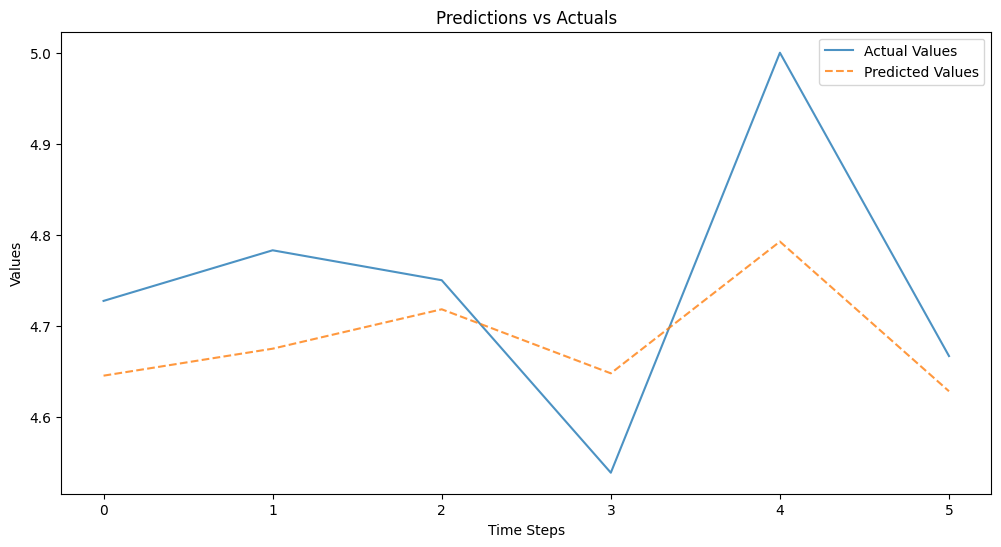

In [33]:


# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(actuals_df.iloc[:, 1], label="Actual Values", linestyle='-', alpha=0.8)
plt.plot(predictions_df.iloc[:, 1], label="Predicted Values", linestyle='--', alpha=0.8)
plt.title("Predictions vs Actuals")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()

In [34]:
# RNN

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Prepare Data
X = lagged_features[lagged_columns].values  # Input features (lagged)
y = lagged_features[lagged_columns].values  # Target variables (future steps)

# Scale globally
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# Reshape X for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # (samples, timesteps, features)

# Define the Model
model = Sequential([
    LSTM(units=64, activation='tanh', input_shape=(1, X_scaled.shape[2]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y_scaled.shape[1], activation='linear')  # Predict all target variables
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Cross-Validation
tscv = TimeSeriesSplit(n_splits=6)
predictions = []
actuals = []

for fold, (train_index, test_index) in enumerate(tscv.split(X_scaled)):
    # Split data
    X_train_scaled, X_test_scaled = X_scaled[train_index], X_scaled[test_index]
    y_train_scaled, y_test_scaled = y_scaled[train_index], y_scaled[test_index]

    # Train the model
    model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=16, verbose=0)

    # Predict
    y_pred_scaled = model.predict(X_test_scaled)

    # Store results
    predictions.extend(y_pred_scaled)
    actuals.extend(y_test_scaled)

    # Evaluate fold performance
    fold_rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.2f}")

# Overall performance
overall_rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Overall RMSE: {overall_rmse:.2f}")


/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Fold 1 RMSE: 0.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 2 RMSE: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 3 RMSE: 0.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 4 RMSE: 0.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5 RMSE: 0.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 6 RMSE: 0.49
Overall RMSE: 0.58


In [35]:
# future dataset
predictions = np.array(predictions)
actuals = np.array(actuals)
#predictions.reshape(1,-1)
print(predictions.shape)
# Inverse transform if scaled (use y_scaler for targets)
predictions_original = y_scaler.inverse_transform(predictions)
actuals_original = X_scaler.inverse_transform(actuals)

# Create DataFrames for predictions and actuals
predictions_df = pd.DataFrame(predictions_original, columns=lagged_columns)
actuals_df = pd.DataFrame(actuals_original, columns=lagged_columns)

# Optional: Add indices to match your time series data
predictions_df.index = range(len(predictions_df))
actuals_df.index = range(len(actuals_df))

# Combine for comparison (optional)
comparison_df = pd.concat([actuals_df.add_suffix('_actual'), predictions_df.add_suffix('_predicted')], axis=1)

predictions_df.iloc[:, 0]

(6, 25)


0    4.459691
1    4.458343
2    4.477321
3    4.450624
4    4.499870
5    4.465219
Name: 1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin_lag1, dtype: float32

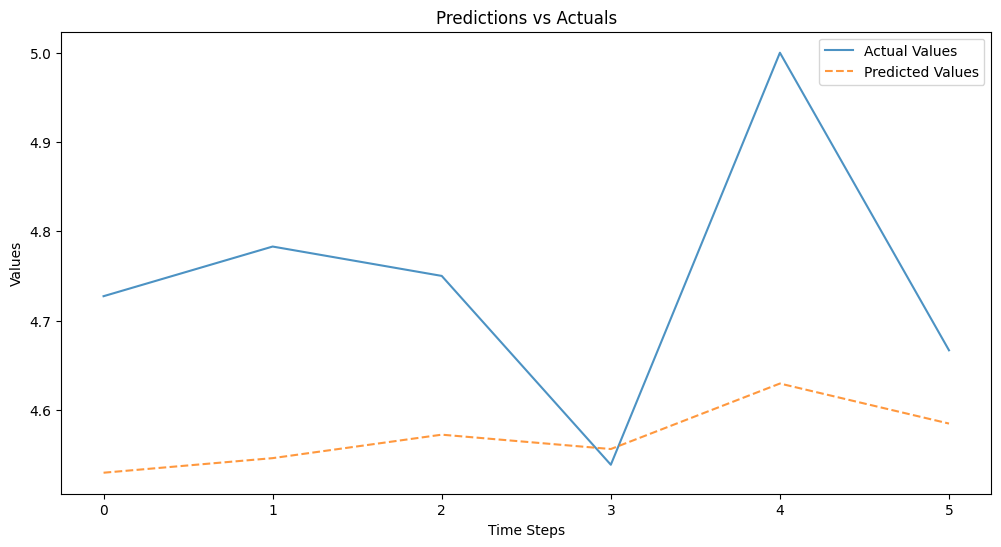

In [36]:


# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(actuals_df.iloc[:, 1], label="Actual Values", linestyle='-', alpha=0.8)
plt.plot(predictions_df.iloc[:, 1], label="Predicted Values", linestyle='--', alpha=0.8)
plt.title("Predictions vs Actuals")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.show()

## CNN
Yksidimensionaalinen konvoluutioverkko käsittelee vektorijonoa esim. sanoja tai lukuja, ikään kuin se olisi kuva. Konvoluutiosuodin liikkuu jonoa pitkin yhden ulottuvuuden mukaisesti, ja sillä on potentiaalia oppia tiettyjä kaavoja tai lyhyitä alijaksoja, jotka ovat olennaisia ennustuksen kannalta.[^72]

## Skaalattu X, skaalaamaton y
CNN-mallimme sisältää vain 4-7 harjoitusaskelta, mikä tarkoittaa, että sillä ei todennäköisesti ole riittävästi dataa oppiakseen tehokkaasti skaalatun $X$ ja skaalaamattoman $y$ välistä yhteyttä. Malli yrittää mukauttaa ennustetun funktion todelliseen funktioon ja rajallinen aikajakso ei riitä, mikä voi johtaa huonoihin ennusteisiin.

Skaalatun y-muuttujan (target) käyttö voi olla hyödyllistä, erityisesti lyhyissä aikasarjoissa, koska se auttaa normalisoimaan tavoitearvojen vaihteluvälin ja varmistaa, että CNN ei kohtaa vaikeuksia käsitellä suuria vaihteluita harjoittelun alkuvaiheessa.

* Jos y:llä on laaja vaihteluväli (esim. pieniä ja suuria arvoja), mallin voi olla vaikeampi konvergoida (saavuttaa vakaita painoja), tai se voi painottaa liikaa suuria arvoja. Skaalaus tuo kaikki arvot samalle tasolle, mikä helpottaa oppimista.
* Kun skaalatut y-arvot ovat samalla tasolla kuin verkon aktivaatioiden vaihteluväli, alkupään ennusteet ovat lähempänä todellisia arvoja, mikä voi parantaa varhaista oppimista.

Vaikka CNN:t voivat käsitellä skaalaamatonta dataa pienissä vaihteluväleissä, skaalaus voi silti nopeuttaa konvergenssia  varmistamalla, että gradientit virtaavat tasaisemmin.

## Skaalaus ja ominaisuuksien tärkeys:

MinMaxScaler skaalaa arvot välille 0–1, mutta säilyttää suhteelliset erot. Esimerkiksi:
Kysymykset datasetissä: 0–5 → Skaalattu: 0–0,005
Lisätyt budjetti-ominaisuudet: 1000–10000 → Skaalattu: 0,1–1

Skaalattu ominaisuus, jolla on korkeammat alkuperäiset arvot, hallitsee silti, koska sen suhteellinen vaihteluväli ja vaikutus gradientteihin optimoinnin aikana ovat suuremmat.
Malli saattaa oppia priorisoimaan korkeamman alueen ominaisuuden malleja, vaikka se olisi skaalattu, koska se voi kattaa suuremman osan skaalatusta alueesta (esim. lähellä arvoa 1).

Korkeammille budjetti-ominaisuuksille tehtiin logaritminen muutos ennen globaalia skaalausta:

```
columns_to_downscale = ['quarterly_budget_lag1', 'quarterly_workforce_lag1']
lagged_features[columns_to_downscale] = np.log1p(lagged_features[columns_to_downscale])
```
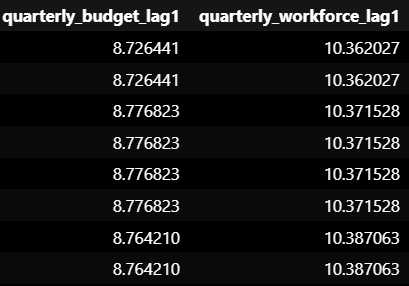


## Satunnainen arvaus

Neuroverkot aloittavat satunnaisesti alustetuilla painoilla. Ensimmäiset ennusteet perustuvat satunnaiseen alustukseen ja voivat ne vaikuttaa meluisilta, kunnes malli oppii tunnistamaan merkityksellisiä kaavoja.

Algoritmit eivät ole varsinaisesti satunnaisia; sen sijaan ne hyödyntävät satunnaisuutta harkitusti. Ne ovat satunnaisia tietyissä rajoissa, ja niitä kutsutaan stokastisiksi algoritmeiksi.

CNN, kuten muutking mallit käyttävät satunnaisuutta läpi opetusprosessin, kunnes tarveeksi hyvä ratkaisu löytyy. Vaarana on myös jumiutua ja satunnaisuuden käyttäminen näissä tilanteissa auttaa iteraation jatkamisessa. Tälläiseen huonompaan ratkaisuun jumiutuminen on nimeltä local optima

Vaikka CNN:t voivat käsitellä skaalaamatonta dataa pienissä vaihteluväleissä, skaalaus voi silti auttaa nopeampaa konvergenssia harjoituksessa varmistamalla, että gradientit virtaavat tasaisemmin.
[^76].


sourecs

[^72]: ISL s.424
[^76]: Machine Learning Mastery. Why Initialize a Neural Network with Random Weights?. https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/?utm_source=chatgpt.com

In [37]:
def predict_with_user_input(model, lagged_features, future_steps=1, extra_features = None):
    """
    Predict future values starting from a specified quarter using user-provided inputs.
    The user specifies the target variable, and input feature values are dynamically provided.
    """

    # Initialize the future prediction data with the last row of the lagged dataset
    future_data = lagged_features.iloc[-1:].copy()
    print(f"\nInitial future data:\n{future_data}")

    # Placeholder for future predictions
    future_predictions = []

    # Generate predictions for the specified number of future steps
    for step in range(future_steps):
        print(f"\nStep {step + 1} of {future_steps}: Predicting for 2024Q{step + 1}")

        if extra_features:
            # Prompt the user to input feature values
            quarterly_workforce = float(input("Enter quarterly workforce: "))
            quarterly_budget = float(input("Enter quarterly budget: "))

            # Add user inputs to the data with '_lag1' naming convention
            future_data["quarterly_workforce_lag1"] = quarterly_workforce
            future_data["quarterly_budget_lag1"] = quarterly_budget

        scaled_features = X_scaler.transform(future_data[lagged_columns])
        future_data[lagged_columns] = scaled_features
        print("modified future data: ", future_data[lagged_columns])
        if isinstance(model, Sequential):
            # Prepare data for CNN prediction (reshape to [1, timesteps, features])
            cnn_input = future_data[lagged_columns].values
            cnn_input = cnn_input.reshape(1, 1, -1)  # Assuming 1 timestep
            next_prediction = model.predict(cnn_input)[0, 0]
            next_prediction = y_scaler.inverse_transform(next_prediction.reshape(-1, 1)).flatten()
            print(f"Predicted value for 2024Q{step + 1}: {next_prediction}")

        else:
            # Predict the next value
            next_prediction = model.predict(future_data[lagged_columns])
            print(f"Predicted value for 2024Q{step + 1}: {next_prediction}")

        # Append the prediction to the results
        future_predictions.append(next_prediction)

        # Update the lagged feature for the target column with the predicted value
        future_data[lagged_columns] = next_prediction

    # Generate future time periods starting from 2024Q1
    start_period = pd.Period("2024Q1", freq="Q").to_timestamp()
    future_quarters = pd.date_range(start=start_period, periods=future_steps, freq="Q")

    # Create a DataFrame to store the future predictions
    future_predictions_df = pd.DataFrame({
        'quarter': future_quarters,
        'predicted_value': future_predictions
    })

    return future_predictions_df


# Example Usage
try:
    # Assuming `model` is a pre-trained model and `lagged_features` is your dataset
    future_steps = 2  # Predict for 4 quarters (e.g., 2024Q1 to 2024Q4)
    future_predictions_df = predict_with_user_input(model, lagged_features, future_steps)
    print("\nFuture predictions:")
    print(future_predictions_df)
except ValueError as e:
    print(e)


Initial future data:
   quarter datajoukko  \
4  03_2023     kainuu   

   1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
4                                                4.2                                      

   2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
4                                                4.0                             

   3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
4                                           3.952381                                   

   4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
4                                           4.444444                    

   5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
4                                           4.076923         

   6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan  \
4                                  

/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


# Future Prediction

In [40]:
future_steps = 1

# Initialize the future predictions DataFrame with the last row of the lagged dataset
future_data = lagged_features.iloc[-1:].copy()
print(f"Initial future data:\n{future_data}")

# Placeholder for future predictions
future_predictions = []
print(f"Predicting the next {future_steps} quarter(s) for the question: {target_column}")

for step in range(future_steps):
    # Predict the next value using the current lagged feature
    next_prediction = model.predict(future_data[lagged_columns])[0]
    print(f"Step {step + 1}: Current lagged values:\n{future_data[lagged_columns]}")
    print(f"Step {step + 1}: Predicted value: {next_prediction}")

    # Append the prediction to the results
    future_predictions.append(next_prediction)

    # Update the lagged feature with the predicted value for the next step
    future_data[f"{target_column}_lag1"] = next_prediction

# Generate future quarters
start_period = lagged_features['period'].iloc[-1].to_timestamp()
future_quarters = pd.date_range(start=start_period, periods=future_steps + 1, freq='QE')[1:]

# Create a DataFrame to store the future predictions
future_predictions_df = pd.DataFrame({
    'quarter': future_quarters,
    'predicted_value': future_predictions
})

# Display results
print("Future predictions:")
print(future_predictions_df)



Initial future data:
   quarter datajoukko  \
4  03_2023     kainuu   

   1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin  \
4                                                4.2                                      

   2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa  \
4                                                4.0                             

   3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta  \
4                                           3.952381                                   

   4_hoitajat_pyysivat_minulta_anteeksi_jos_hoidossani_tapahtui_virhe  \
4                                           4.444444                    

   5_hoitajat_puuttuivat_epakohtaan_josta_mainitsin_heille  \
4                                           4.076923         

   6_hoitajat_kertoivat_minulle_uuden_laakkeen_antamisen_yhteydessa_miksi_laaketta_annetaan  \
4                                   

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

# Feature Importance


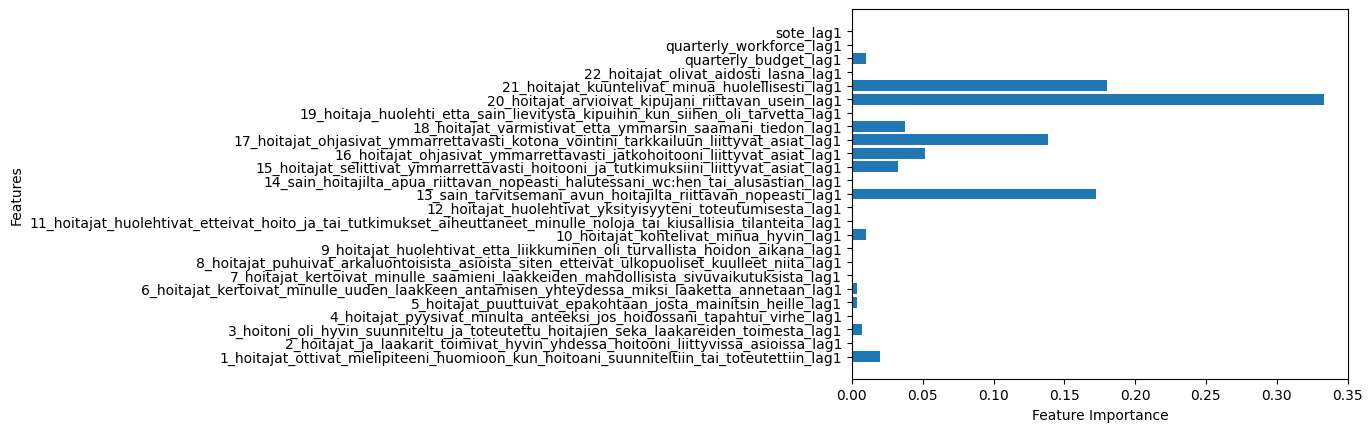

In [ ]:
# Higher Importance: Features with higher importance contribute more to the model's predictions.
importance = model.feature_importances_
plt.barh(lagged_columns, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
# Select a test instance
test_instance = X_test.iloc[0].copy()
# Analyze sensitivity for each feature
sensitivity = {}
for feature in X.columns:
    original_value = test_instance[feature]
    
    # Perturb the feature value (e.g., increase and decrease by 10%)
    perturbed_values = [original_value * 0.9, original_value * 1.1]
    predictions = []
    
    for value in perturbed_values:
        test_instance[feature] = value
        pred = model.predict([test_instance])[0]
        predictions.append(pred)
    
    # Calculate sensitivity as the range of predictions
    sensitivity[feature] = max(predictions) - min(predictions)
    test_instance[feature] = original_value  # Reset the value

# Sort features by sensitivity
sorted_sensitivity = sorted(sensitivity.items(), key=lambda x: x[1], reverse=True)

# Print most sensitive features
print("Sensitivity Analysis:")
for feature, change in sorted_sensitivity:
    print(f"{feature}: Change in Prediction = {change:.4f}")

Sensitivity Analysis:
13_sain_tarvitsemani_avun_hoitajilta_riittavan_nopeasti_lag1: Change in Prediction = 0.0592
17_hoitajat_ohjasivat_ymmarrettavasti_kotona_vointini_tarkkailuun_liittyvat_asiat_lag1: Change in Prediction = 0.0524
20_hoitajat_arvioivat_kipujani_riittavan_usein_lag1: Change in Prediction = 0.0464
15_hoitajat_selittivat_ymmarrettavasti_hoitooni_ja_tutkimuksiini_liittyvat_asiat_lag1: Change in Prediction = 0.0363
21_hoitajat_kuuntelivat_minua_huolellisesti_lag1: Change in Prediction = 0.0342
18_hoitajat_varmistivat_etta_ymmarsin_saamani_tiedon_lag1: Change in Prediction = 0.0231
10_hoitajat_kohtelivat_minua_hyvin_lag1: Change in Prediction = 0.0111
1_hoitajat_ottivat_mielipiteeni_huomioon_kun_hoitoani_suunniteltiin_tai_toteutettiin_lag1: Change in Prediction = 0.0000
2_hoitajat_ja_laakarit_toimivat_hyvin_yhdessa_hoitooni_liittyvissa_asioissa_lag1: Change in Prediction = 0.0000
3_hoitoni_oli_hyvin_suunniteltu_ja_toteutettu_hoitajien_seka_laakareiden_toimesta_lag1: Change 

/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/andy/code/projekti-2-ml-2024/project_sigma/.venv/lib/python3.13/site-packages/skle

0.9472863644637418
Feature Correlation with Target:


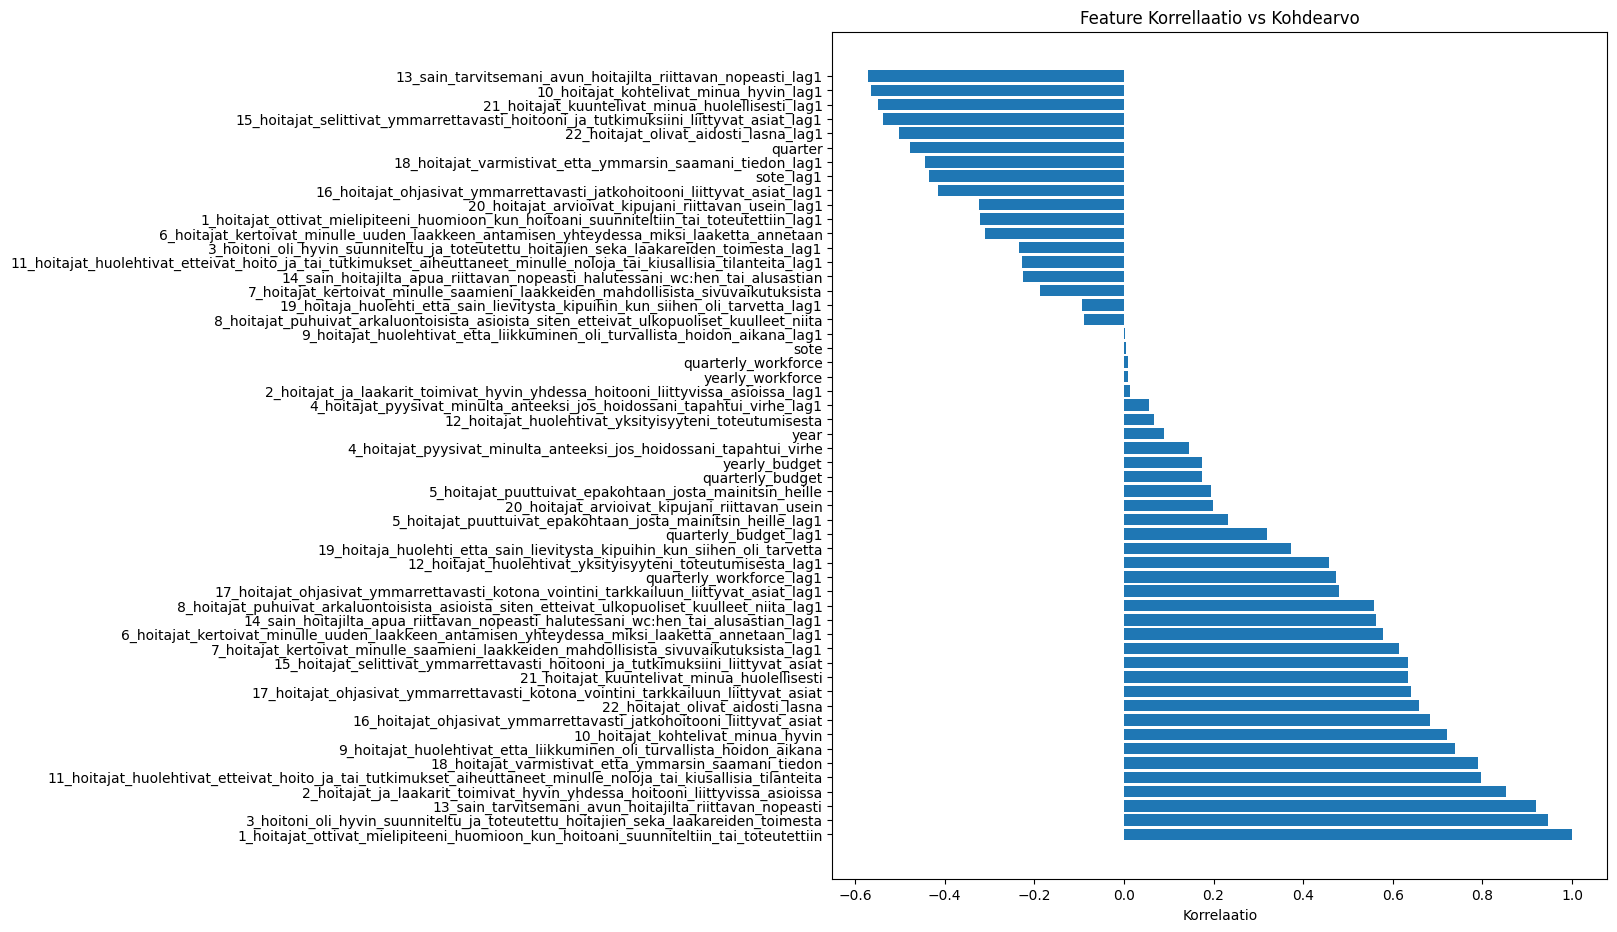

In [ ]:
correlation = lagged_features.drop(['period', 'datajoukko'], axis=1).corr()[target_column].sort_values(ascending=False)
second_max_corr_feature = correlation.index[1]
correlation_second = lagged_features[second_max_corr_feature].corr(lagged_features[target_column])



print(correlation_second)
print("Feature Correlation with Target:")
plt.figure(figsize=(10,11))
plt.barh(correlation.index, correlation.values)

plt.xlabel("Korrelaatio")
plt.title("Feature Korrellaatio vs Kohdearvo")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

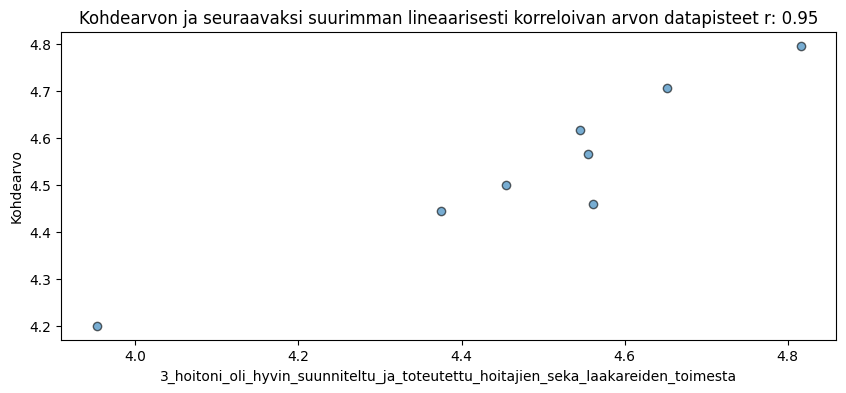

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(
    lagged_features[second_max_corr_feature], 
    lagged_features[target_column], 
    alpha=0.6, 
    edgecolor='k',
)
plt.title(f"Kohdearvon ja seuraavaksi suurimman lineaarisesti korreloivan arvon datapisteet r: {correlation.values[1]:.2f}")
plt.ylabel("Kohdearvo")
plt.xlabel(second_max_corr_feature)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

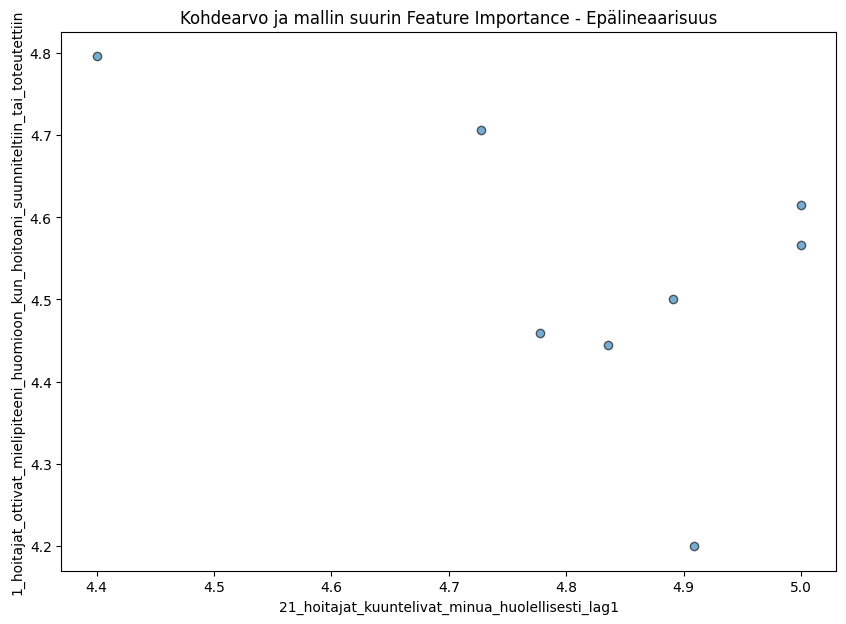

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(
    lagged_features['21_hoitajat_kuuntelivat_minua_huolellisesti_lag1'], 
    lagged_features[target_column], 
    alpha=0.6, 
    edgecolor='k',
)
plt.title(f"Kohdearvo ja mallin suurin Feature Importance - Epälineaarisuus")
plt.ylabel(target_column)
plt.xlabel('21_hoitajat_kuuntelivat_minua_huolellisesti_lag1')
plt.show

# Korrellaatio ja Importance
## Mitä korrelaatiograafi kertoo?

Datajoukkomme korrelaatio mitataan käyttäen Pearsonin korrelaatiota. Pearsonin korrellaatio tunnistaa lineaariset relaatiot, joten datapisteiden hajonta on hyvä tarkistaa.

Korkea korrelaatio (positiivinen tai negatiivinen):

* Piirteet, joilla on korkea positiivinen korrelaatio (esim. lähellä +1), tarkoittavat, että kun piirteen arvo kasvaa, myös y yleensä kasvaa.
* Piirteet, joilla on korkea negatiivinen korrelaatio (esim. lähellä -1), tarkoittavat, että kun piirteen arvo kasvaa, y yleensä pienenee.

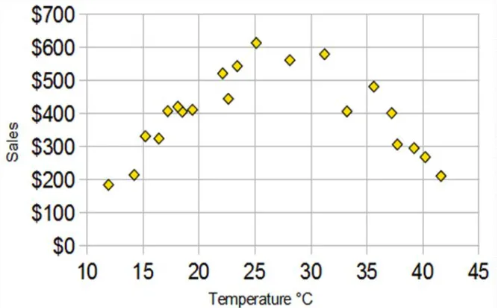

Kuva: *Esimerkki Epälineaarisesta korrelaatiosta, jossa korrelaatiokerroin on lähellä nollaa* lähde: https://towardsdatascience.com/data-correlation-can-make-or-break-your-machine-learning-project-82ee11039cc9

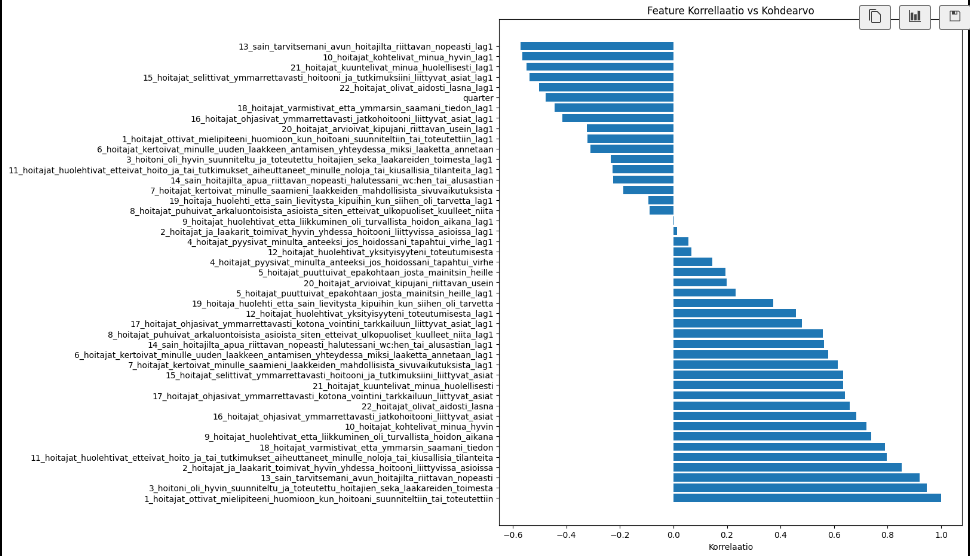

Kuva 2: *Kainuun kyselydatan korrelaatiot vs kohdekysymys 1*


Korkea korrelaatio viittaa yleensä lineaariseen yhteyteen kohdemuuttujan kanssa. Seuraava kuva on scatter-plot kyseisestä kohdemuuttujasta ja toiseksi suurimman korrelaation omaavan muuttujan kanssa (kysymys 3).

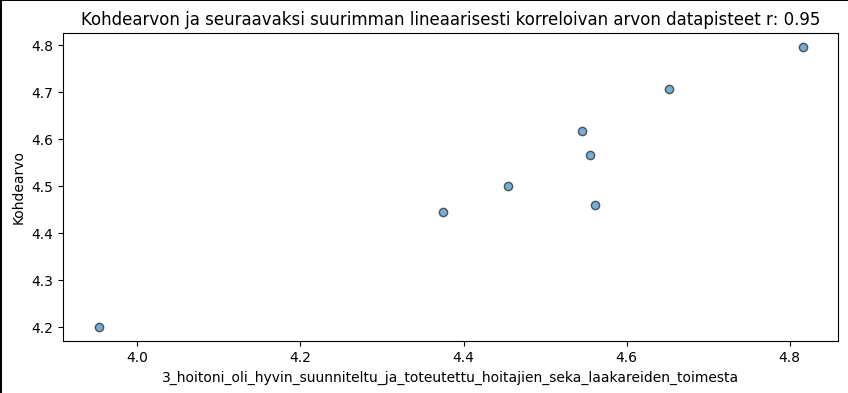

Kuva 3: *Lineaarinen yhteys kysymys 3 ja Kysymys 1 (kohdemuuttuja) välillä*

**Viivästetyt piirteet (lagged features):**

* lag1 on aikaisemman kvartaali-kauden arvo.
* Viivästetyt piirteet kuvaavat, miten piirteen aiemmat arvot vaikuttavat kohteeseen.
* Korkea korrelaatio viivästetyn piirteen (esim. lag1) kanssa osoittaa, että edellisen kauden arvo vaikuttaa ennustettavaan arvoon vahvemmin.

**Matala tai lähes nollakorrelaatio:**

Piirteet, joilla on korrelaatio lähellä nollaa, osoittavat heikon tai olemattoman lineaarisen suhteen kohteen kanssa. Tämä ei kuitenkaan tarkoita, että ne olisivat merkityksettömiä epälineaarisissa malleissa.

## Mitä Importancegraafi kertoo?

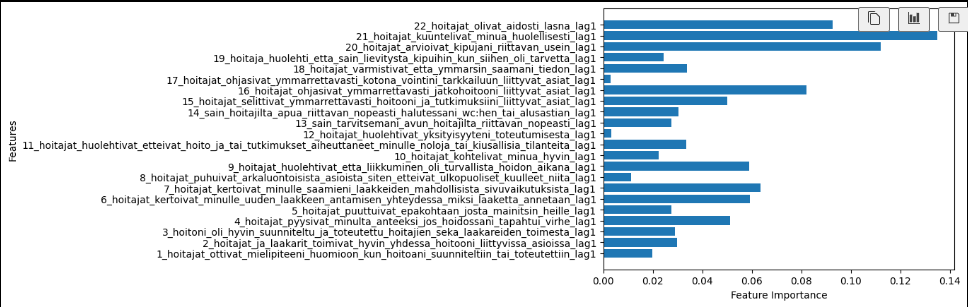

*Kuva 4: Importance Feature graafi* 

Korkea korrellaatio viittaa siihen, että kysymys (feature) vaikuttaa suoraan kohdearvoon (target). Kun Importance on myös korkealla, malli nojautuu vahvasti tähän piirteeseen (feature) ennusteen (target value) tekemisessä.

Piirteen (feature) korrelaatio voi olla matala, mutta se voi silti olla merkittävä tekijä ennustuksessa. Feature Importance voi tunnistaa tälläiset mahdolliset epälineaariset riippuvuudet.

Kun katsotaan Feature Importance graafia (kuva 4), huomataan, että kysymyksellä 21(lag) on suurin tärkeys mallin ennustamiseen, mutta korrelaatiograafissa se ei ole merkittävä (-0.4). Voisiko tämä kertoa epälineaarisesta yhteydestä?

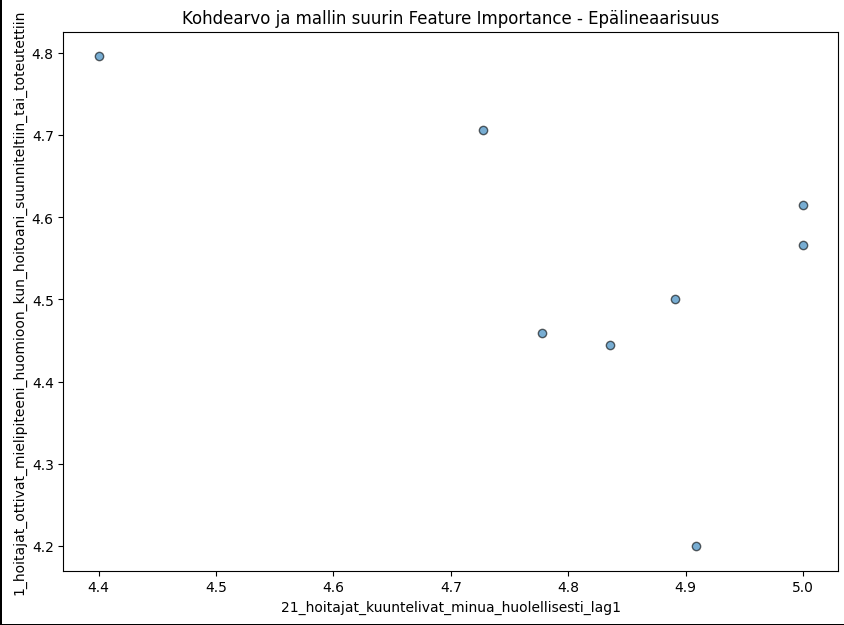

*Kuva 5: Epälineaarinen yhteys kohdemuuttujan ja kysymys 21(lag):n välillä*

Kun siirrymme 4.4 arvosta lähemmäs 4.8 arvoon, ennusteen arvo laskee, mutta kun jatkamme 4.8 kohti täydellistä arvosanaa 5, ennuste alkaakin kasvamaan. Tämä kertoo epälineaarisesta yhteydestä.



# Datajoukon Imputointi

lähteet: 

## vuoden 2020 - 2022 "Terveydenhuollon käyttömenot yhteensä" 
excel-tiedosto: https://thl.fi/documents/155392151/0/Terveydenhuollon+menot+ja+rahoitus+2022,+ennakkotiedot_v2024_06_27+(1).xlsx/bf2f83ab-7dc0-b8a4-bb53-48f7a8597095?t=1719474968417

## vuoden 2023 Hyvinvointialueiden rahoitus ja valtion toimenpiteetbudjetti
Talousarvioesitys 2023: https://budjetti.vm.fi/sisalto.jsp?year=2023&lang=fi&maindoc=/2023/tae/hallituksenEsitys/hallituksenEsitys.xml&opennode=0:1:3:79:81: 
ja 
TILASTORAPORTTI 49/2024: https://www.julkari.fi/bitstream/handle/10024/149898/Sosiaali-%20ja%20terveyspalvelujen%20talous%202023.pdf?sequence=6&isAllowed=y


# Kuntien terveyspalvelujen henkilöstö Feature

Terveys- ja sosiaalipalvelujen henkilöstömittauksia on saatavilla vuodelle 2022 saakka. Datajoukkoon lisätään vuodesta 2020 eteenpäin olevat henkilöstön määrät, seuraavan vuoden kvartaaleihin. Henkilöstön määrä on yksi vaikuttava tekijä asiakastyytyväisyyteen, jolla voi olla vaikutusta seuraavien vuosien tyytyväisyyskyselyihin.

2023-2024 dataa ei ole tällä hetkellä saatavilla. Ennustusta tehdessä, syötetään arvio henkilöstön määrästä.

Lähteet: 

TILASTORAPORTTI 41/2024: https://www.julkari.fi/bitstream/handle/10024/149430/Tilastoraportti_41_2024.pdf?sequence=1&isAllowed=y

# Käyttömenot ja henkilöstö

Kolme featurea lisättiin: Terveydenhuollon menot vuosittain, henkilöstön määrä, ja maakunta-ja soteuudistuksen binäärinen arvo 0/1. Nämä featuret eivät kuitenkaan saaneet nollasta poikkeavaa tärkeyttä (feature importance) joka vaikuttaisi mallin ennustukseen, kuten mallin feature importance-graafista huomaamme. Tämä todennäköisesti johtuu lisättyjen featureiden monotonisesta kasvusta aikaan nähden, eikä suurempia muutoksia tyytyväisyydessä ole tapahtunut. Malli ei tällöin ymmärrä suurten budjetti- tai työvoimaleikkausten vaikutusta ennustettavaan muuttujaan.

# Ennustus

Käytämme HOPP kainuun datajoukossa ainoastaan yhtä lagged arvoa, yksinkertaisesti siitä syystä, että kausittaista dataa on vain 9 riviä, vuodesta 2021-2023 ja osa näiden vuosien kvartaaleja puuttui kokonaan. Datajoukon imputoinnista on selitetty tarkemmin omassa osiossa. Yhdellä lagged arvolla, ei voida vielä ennustaa kausittaisia vaihteluja, eikä kovin pitkälle tulevaisuuteen. Aikaa ei myöskään otetan huomioon ennustuksissa, esimerkiksi kvartaalia tai vuotta. Yksi vaihtoehto olisi käyttää syklistä featurea, kuten siniä ja cosinia. Mallimme ennustaa yhden askeleen eteenpäin ja kysyy seuraavaa ennustusta varten käyttäjältä lisätietoja, kuten vuosittainen käyttömeno ja henkilöstön määrä terveydenhuollossa, myös maakunta- ja soteuudistus lisätänään vuodesta 2023, mutta binäärinen arvo 1 jatkuu läpi ennustuksen vakiona.

## Validointi

Aikajaksomallien testaukseen olemme käyttäneet backtestingiä, joka sopii aikajaksotettuun dataan (time-series). Tyypillistä ristiin validointia (cross validation) emme voi käyttää aikaan sidottuun dataan, sillä datapisteet ovat riippuvaisia ajasta ja kulkevat yhteen suuntaan. Laajenevassa ikkunoinnissa (expanding window), otamme aluksi tietyn otannan esim. 3 ensimmäistä kvartaalia ja testaamme sitä neljänteen riviin (sen hetken tulevaisuus). Jatkamme, kunnes datajoukon viimeisin (nykyhetki) tulee vastaan. Malli koulutetaan osajoukoilla, kunnes koko data on fitattu.


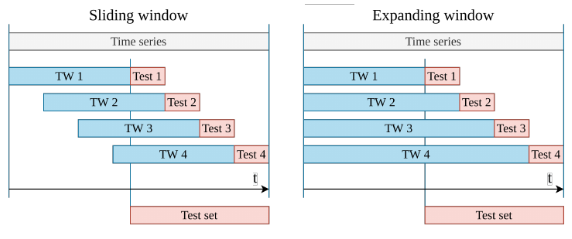

*Kuva. Liukuva ja laajeneva ikkunointi* [^23]

Validointimetriikkana käytämme Root Mean Squared Error:a (RMSE), joka on yksi yleisimmistä koneoppimisalgoritmien virheeiden keskihajonnan mittauksissa. Arvo kertoo kuinka kaukana olemme todellisesta y:n arvosta. Jos RMSE arvo on 0,21 ja ennustettavan muuttujan skaala on 0-5 välillä, ennustettu arvo on 0,21 pisteen päässä todellisesta y:n arvosta.


[^23]: Preventive maintenance for heterogeneous industrial vehicles with incomplete usage data. https://www.researchgate.net/publication/351885630_Preventive_maintenance_for_heterogeneous_industrial_vehicles_with_incomplete_usage_data